# 1) Author


Student Name: PRAJWAL BHADRAVATHI NARAYANA MURTHY

Student ID - EC211218

## **2) Problem Formulation**

Classification of Potter vs StarWars based on the recording was a basic problem in the project. However, with sufficient amount of data in our demographic spreedsheet, I formulated an advanced problem i,e **Prediction of Gender, based on the audio recordings**.

To achive solution for this advance problem, I have used the Deep Learning's MLP approach which classifies the participants gender based on the audio samples.

For the Advanced problem to classify gender based on audio sample, I have considered all recordings of 8 songs.

## **3) Pipeline** 

The proposed model in this notebook follows a end-to-end construct that orchestrates the flow of data, transformation and its output form along with a deep learning model. The below steps are followed in the notebook. The pipelines follows similar approach used in Basic solution. **However, one extra step is added which is mapping of participant Gender to each of the recordings using the dempgraphic data**

1.   Fetch raw audio data from QMUL shared drive link.
2.   Data preprocessing using pandas and creating a metadata.csv file which has meta audio data for our model.
3.   Map the gender to each of the audio recording using demographic spreedsheet.
3.   Extracting the features from audio recordings and considering them as predictors.
4.   Split the dataset for training and testing(validation).
4.   Create a ANN model which takes features and labelled input from previous steps.
5.   Train the model with the training dataset and validate the accuracy.
6.   Test the model with random samples and determine if the model is predicting the exact gender as per the demographic data.

## **4) Transformation Stage**

Transformation stage is one of the major part in our project. Since our dataset is related to audio signals, we need to extract features from audio samples and consider them as predictors for our model. 



In this notebook, **MFCC(Mel-frequency cepstral coefficients)** feature extraction technique is used to transform audio samples into a set of features based on the parameters. The extraction of this feature in this notebook have been implemented using **Librosa library**.


Since MFCC is one of the advance feature for audio samples, and it is one of the best feature to consider for Neural Networks, I have considered MFCC's for Advanced problem.

Reference used --

  

*   Mel-Frequency Cepstral Coefficients Explained Easily
    https://www.youtube.com/watch?v=4_SH2nfbQZ8

*   Extracting Mel-Frequency Cepstral Coefficients with Python
    https://www.youtube.com/watch?v=WJI-17MNpdE
  


## **5) Modelling**

Its always quite difficult to select a specific model for classification problems, especially when we are playing with audio datasets. Though there are good number of ML models like SVM, K-nearest, or Regression which I have implemented for sample dataset, I have considered to explore more options in **Deep Learning** to classify audio samples.

In this notebook, I have explored the classification of audio samples with **Artificial Neural Networks MLP** using **Keras** and **Tensorflow**.




## **6) Methodology**

To predict the Gender of a recording, MLP has been used. In this notebook, 70% of the dataset is being used to train the neural network. We will be using 70 epochs to iterate through-out dataset with batch size 30.

**Accuracy** will be used as a metrics to evaluate how well the model predicted the gender.

**Categorical_crossentropy** is used as loss function. If we get the low score, we can determine that the model is performing well.

To get the quick results and reduce losses, **Adam optimizer** is used in the model

Along with the above techniques, model will be validated manually using the sample audio files. After testing, all audio files are iterated for gender prediction and will be verified with original demographic file 










## **7) Dataset**

The dataset used to predict gender is downloaded from QMUL's shared link provided. For the advanced problem, all the 8 songs have been used to train the neural network.
Overall, there were **3330** audio files out of which **2288** have been considered since, rest of the audio samples were not able to map to the gender as these participants data was unavailable in demographic file.

Further in the notebook, explaination about the **data preprocessing, visualization, feature extration** and **modelling** is done for each code cell.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

In [84]:
#Access all audio files in local drive using glob
audio_files_path = 'D:/ML_Audio_Datasets/ML_Audio_Data/*.wav'
files = glob.glob(audio_files_path)
print("The total number of all 8 song recordings downloaded and extracted are : ",len(files))

The total number of all 8 song recordings downloaded and extracted are :  3330


**Creating CSV file to map Gender to each audio files**

In [26]:
temp_files=[]
for fille in files:
  temp_files.append(fille.split('/')[-1].split('\\')[-1])

temp_file_df = pd.DataFrame(temp_files)
temp_file_df.to_csv('Advanced.csv')

**Gender mapping has been done using Excel's VLOOKUP function and the output file is loaded as shown below**

In [181]:

Advanced_metadata = pd.read_csv("D:/ML_Audio_Datasets/MetaData_All_8_Songs.csv")
Advanced_metadata.head()

,File_ID,Participant,Interpretation,Interpretation Number,Song,Class,Gender
0,S1_hum_2_Potter.wav,S1,hum,2,Potter.wav,Potter,Male
1,S1_whistle_2_Potter.wav,S1,whistle,2,Potter.wav,Potter,Male
2,S2_hum_2_Potter.wav,S2,hum,2,Potter.wav,Potter,Unknown
3,S2_whistle_2_Potter.wav,S2,whistle,2,Potter.wav,Potter,Unknown
4,S3_hum_1_Potter.wav,S3,hum,1,Potter.wav,Potter,Male


In [182]:
print('Number of recording samples associated with Males is ',Advanced_metadata[Advanced_metadata['Gender']=='Male'].shape[0])
print('Number of recording samples associated with Females is ',Advanced_metadata[Advanced_metadata['Gender']=='Female'].shape[0])
print('Number of recording samples without gender classification ',Advanced_metadata[Advanced_metadata['Gender']=='Unknown'].shape[0])


Number of recording samples associated with Males is  1496
Number of recording samples associated with Females is  792
Number of recording samples without gender classification  1032


Text(0, 0.5, 'Number of Recordings')

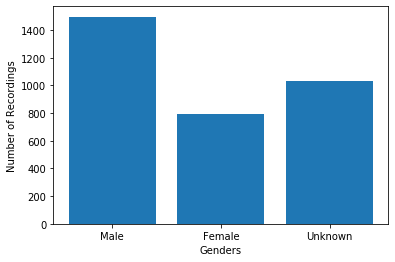

In [218]:
##Visualizing the samples assocaited with gender
df = pd.DataFrame({'Gender':['Male','Female','Unknown'], 'Counts':[Advanced_metadata[Advanced_metadata['Gender']=='Male'].shape[0],Advanced_metadata[Advanced_metadata['Gender']=='Female'].shape[0],Advanced_metadata[Advanced_metadata['Gender']=='Unknown'].shape[0]]})


plt.bar(df['Gender'],df['Counts'])
plt.xlabel('Genders')
plt.ylabel('Number of Recordings')

In [209]:
## Visualizing the number of participants

Number of unique Male participants is : 94
Number of Unique Female participants is : 50
Number of Unique participants who didnt upload their demographic data  67


Text(0, 0.5, 'Number of Unique Participants')

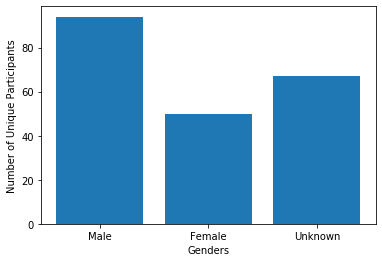

In [220]:
Male_recordings = Advanced_metadata[Advanced_metadata['Gender']=='Male']
print('Number of unique Male participants is :',Male_recordings['Participant'].unique().shape[0])

Female_recordings = Advanced_metadata[Advanced_metadata['Gender']=='Female']
print('Number of Unique Female participants is :',Female_recordings['Participant'].unique().shape[0])

Unknown_recordings = Advanced_metadata[Advanced_metadata['Gender']=='Unknown']
print('Number of Unique participants who didnt upload their demographic data ',Unknown_recordings['Participant'].unique().shape[0])

plt.bar(df_1['Gender'],df_1['Counts'])
plt.xlabel('Genders')
plt.ylabel('Number of Unique Participants')

67 participants have not submitted the demographic data. All the recordings of these 67 participants have been removed from training.

In [85]:
df_final_recordings_data = pd.read_csv("D:/ML_Audio_Datasets/Gender_classification_Final.csv")

In [221]:
print('Total number of recordings considered for Gender calssification after removal of unknown participants',df_final_recordings_data['File_ID'].count())

Total number of recordings considered for Gender calssification after removal of unknown participants 2288


In [222]:
## After removal of Unknown participants, we now have two classes
df_final_recordings_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

**MFCC Visualization**

In [236]:
def mfcc_vis(file_name):
    
    signal, sr = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)
    plt.figure(figsize=(15,5))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2f")
    plt.show()
    ipd.Audio(file_name)

This is a MFCC Visualization of File S1_hum_2_Potter.wav  recorded by a Male


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass y=[ 0.00028456  0.00046235  0.00043296 ... -0.00058773 -0.00059193
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


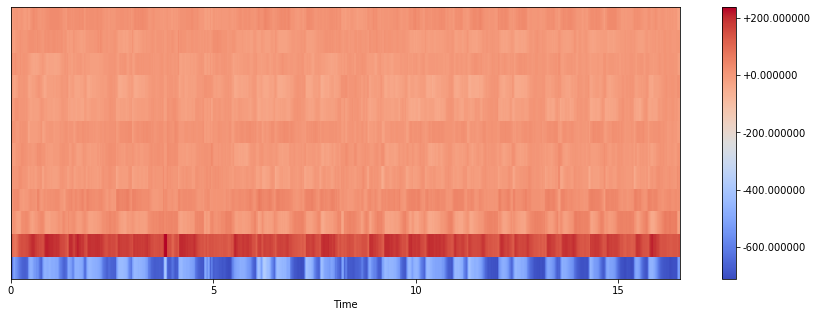

This is a MFCC Visualization of File S4_hum_1_Potter.wav  recorded by a Female


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass y=[ 9.2928866e-07 -1.8531787e-06  1.8594572e-05 ...  5.9704787e-05
  1.2250703e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


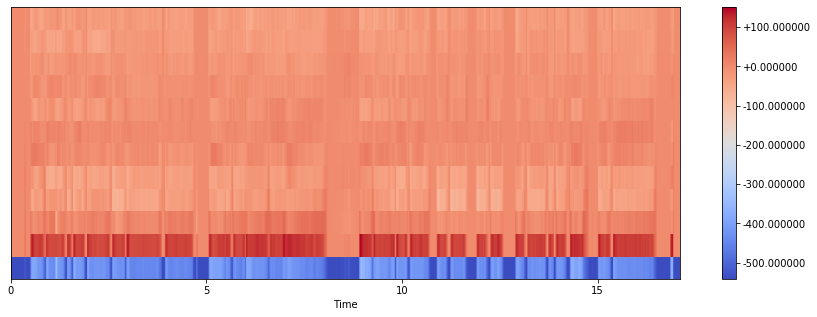

In [243]:
## MFCC Visualization of a sample audio recorded by a Male and Female participant

import librosa.display
audio_file = "D:/ML_Audio_Datasets/Advanced_Dataset/"
for index_num,row in (Male_recordings.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_file), str(row["File_ID"]))
    print("This is a MFCC Visualization of File",str(row["File_ID"])," recorded by a",str(row["Gender"]))
    mfcc_vis(file_name)
    break

for index_num,row in (Female_recordings.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_file), str(row["File_ID"]))
    print("This is a MFCC Visualization of File",str(row["File_ID"])," recorded by a",str(row["Gender"]))
    mfcc_vis(file_name)
    break

    

# Results

MFCC feature is extracted for each of the audio sample to predict the gender of a recording. 40 co-efficients are used in the extraction.

To fetch the features, Librosa's feature.mfcc is used

In [244]:
## Feature Extraction

In [100]:
def MFCC_features_extractor(file):
  
    audio_data, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaling_feat = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaling_feat

In [101]:
path_data = "D:/ML_Audio_Datasets/ML_Audio_Data/"

import numpy as np
extracted_features=[]
for index_num,row in tqdm(df_final_recordings_data.iterrows()):
    file_name = os.path.join(os.path.abspath(path_data), str(row["File_ID"]))
    final_class_labels=row["Gender"]
    data=MFCC_features_extractor(file_name)
    extracted_features.append([data,final_class_labels])


0it [00:00, ?it/s]
1it [00:02,  2.39s/it]
2it [00:02,  1.78s/it]
3it [00:03,  1.35s/it]
4it [00:03,  1.03s/it]
5it [00:03,  1.20it/s]
6it [00:04,  1.39it/s]
7it [00:04,  1.64it/s]
8it [00:04,  1.83it/s]
9it [00:05,  2.06it/s]
10it [00:05,  2.15it/s]
11it [00:05,  2.45it/s]
12it [00:06,  2.57it/s]
13it [00:06,  2.66it/s]
14it [00:07,  2.70it/s]
15it [00:07,  2.87it/s]
16it [00:07,  3.04it/s]
17it [00:07,  3.13it/s]
18it [00:08,  2.57it/s]
19it [00:08,  2.42it/s]
20it [00:09,  2.56it/s]
21it [00:09,  2.59it/s]
22it [00:09,  2.73it/s]
23it [00:10,  2.77it/s]
24it [00:10,  2.96it/s]
25it [00:10,  3.03it/s]
26it [00:11,  3.17it/s]
27it [00:11,  3.04it/s]
28it [00:11,  2.83it/s]
29it [00:12,  2.91it/s]
30it [00:12,  2.87it/s]
31it [00:13,  2.74it/s]
32it [00:13,  2.71it/s]
33it [00:13,  2.66it/s]
34it [00:14,  2.82it/s]
35it [00:14,  2.85it/s]
36it [00:14,  2.93it/s]
37it [00:15,  2.91it/s]
38it [00:15,  2.75it/s]
39it [00:15,  2.72it/s]
40it [00:16,  2.76it/s]
41it [00:16,  2.84it/s]
42it 

659it [03:47,  3.26it/s]
660it [03:48,  3.28it/s]
661it [03:48,  3.21it/s]
662it [03:48,  3.15it/s]
663it [03:49,  3.21it/s]
664it [03:49,  3.23it/s]
665it [03:49,  3.32it/s]
666it [03:50,  3.28it/s]
667it [03:50,  3.24it/s]
668it [03:50,  3.24it/s]
669it [03:51,  3.23it/s]
670it [03:51,  3.21it/s]
671it [03:51,  3.11it/s]
672it [03:52,  3.15it/s]
673it [03:52,  3.21it/s]
674it [03:52,  3.12it/s]
675it [03:52,  3.10it/s]
676it [03:53,  3.12it/s]
677it [03:53,  3.15it/s]
678it [03:53,  3.10it/s]
679it [03:54,  3.00it/s]
680it [03:54,  3.01it/s]
681it [03:54,  3.11it/s]
682it [03:55,  3.09it/s]
683it [03:55,  3.16it/s]
684it [03:55,  3.22it/s]
685it [03:56,  3.26it/s]
686it [03:56,  3.24it/s]
687it [03:56,  3.26it/s]
688it [03:57,  3.18it/s]
689it [03:57,  3.17it/s]
690it [03:57,  3.23it/s]
691it [03:58,  3.25it/s]
692it [03:58,  3.24it/s]
693it [03:58,  3.33it/s]
694it [03:58,  3.24it/s]
695it [03:59,  3.13it/s]
696it [03:59,  3.08it/s]
697it [03:59,  3.20it/s]
698it [04:00,  3.20it/s]


1301it [07:46,  2.86it/s]
1302it [07:46,  2.91it/s]
1303it [07:46,  2.99it/s]
1304it [07:47,  3.09it/s]
1305it [07:47,  3.09it/s]
1306it [07:47,  3.16it/s]
1307it [07:47,  3.13it/s]
1308it [07:48,  3.18it/s]
1309it [07:48,  3.17it/s]
1310it [07:48,  3.12it/s]
1311it [07:49,  3.05it/s]
1312it [07:49,  3.01it/s]
1313it [07:49,  3.11it/s]
1314it [07:50,  3.11it/s]
1315it [07:50,  3.11it/s]
1316it [07:50,  3.09it/s]
1317it [07:51,  3.12it/s]
1318it [07:51,  3.18it/s]
1319it [07:51,  3.14it/s]
1320it [07:52,  3.31it/s]
1321it [07:52,  3.33it/s]
1322it [07:52,  3.25it/s]
1323it [07:53,  3.18it/s]
1324it [07:53,  3.16it/s]
1325it [07:53,  3.17it/s]
1326it [07:53,  3.22it/s]
1327it [07:54,  3.37it/s]
1328it [07:54,  3.30it/s]
1329it [07:54,  3.38it/s]
1330it [07:55,  3.30it/s]
1331it [07:55,  3.31it/s]
1332it [07:55,  3.29it/s]
1333it [07:56,  3.26it/s]
1334it [07:56,  3.13it/s]
1335it [07:56,  3.10it/s]
1336it [07:57,  3.09it/s]
1337it [07:57,  3.17it/s]
1338it [07:57,  3.07it/s]
1339it [07:5

1931it [11:14,  2.87it/s]
1932it [11:15,  2.80it/s]
1933it [11:15,  2.41it/s]
1934it [11:16,  2.45it/s]
1935it [11:16,  2.51it/s]
1936it [11:16,  2.55it/s]
1937it [11:17,  1.77it/s]
1938it [11:18,  2.00it/s]
1939it [11:18,  2.17it/s]
1940it [11:18,  2.27it/s]
1941it [11:19,  2.39it/s]
1942it [11:19,  2.65it/s]
1943it [11:19,  2.80it/s]
1944it [11:20,  2.91it/s]
1945it [11:20,  3.02it/s]
1946it [11:20,  3.13it/s]
1947it [11:21,  3.18it/s]
1948it [11:21,  2.78it/s]
1949it [11:21,  2.78it/s]
1950it [11:22,  2.96it/s]
1951it [11:22,  3.07it/s]
1952it [11:22,  3.18it/s]
1953it [11:23,  3.19it/s]
1954it [11:23,  3.10it/s]
1955it [11:23,  3.12it/s]
1956it [11:24,  3.14it/s]
1957it [11:24,  3.05it/s]
1958it [11:24,  3.09it/s]
1959it [11:25,  2.99it/s]
1960it [11:25,  3.01it/s]
1961it [11:25,  3.00it/s]
1962it [11:25,  3.09it/s]
1963it [11:26,  3.07it/s]
1964it [11:26,  3.04it/s]
1965it [11:26,  3.00it/s]
1966it [11:27,  3.09it/s]
1967it [11:27,  2.72it/s]
1968it [11:28,  2.74it/s]
1969it [11:2

In [249]:
Gender_feature_df = pd.DataFrame(extracted_features, columns=['feature','Gender_Class'])
print(Gender_feature_df['feature'][0].shape[0]," coefficients are extracted for each of the audio sample. \nEach recording features array is associated with Gender as a label")
Gender_feature_df.head()


40  coefficients are extracted for each of the audio sample. 
Each recording features array is associated with Gender as a label


,feature,Gender_Class
0,"[-570.35205, 165.22372, 11.892204, 28.463907, ...",Male
1,"[-559.3699, 109.55884, -44.326736, 30.62622, 1...",Male
2,"[-346.79388, 136.5315, -0.27057907, 28.94037, ...",Male
3,"[-385.84097, 136.3798, -2.9455836, 12.064976, ...",Male
4,"[-455.03027, 79.5819, 12.256419, -22.52085, -2...",Female


In [106]:
## X represents the predictors, these predictors(features) is used to train the model-
## to determine if a recording is sung by a male or female
X = np.array(Gender_feature_df['feature'].tolist())

## y represents the class labels, there are 2 lables- Male and Female
y=np.array(Gender_feature_df['Gender_Class'].tolist())


In [111]:
print("Number of recordings used for gender classification is",X.shape[0]," and",X.shape[1],"MFCC features are used")

Number of recordings used for gender classification is 2288  and 40 MFCC features are used


In [112]:
## importing necessary tensorflow, keras libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LabelEncoder is used to encode the categorical text data into numerical data 

In [113]:
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [251]:
print("After Label encoding the Y representaion is \n",y)

After Label encoding the Y representaion is 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


To split the dataset, sklearn.model_selection.train_test_split is used. The testing size is 30% and training size is 70% 

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [253]:
print(" Number of samples considered for Training :",X_train.shape[0])
print(" Number of samples considered for Testing :",X_test.shape[0])

 Number of samples considered for Training : 1601
 Number of samples considered for Testing : 687


In [254]:
number_of_classes = y.shape[1]
print('Number of classes in our dataset is :',number_of_classes)

Number of classes in our dataset is : 2


In [255]:
## Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from sklearn import metrics 

In [128]:
### ANN-MLP model initilization

Using a Sequential model to build our neural network

We will build model comprising of 4 layers


    An Input layer - receives input shape of (40,) since each audio has 40 MFCC columns with 100 nodes
    
    
    Two hidden layers - with nodes 200 and 100 using Rectified Linear Activation
    
    
    An output layer - Output layer has 2 nodes, i,e our number of classes. Softmax is used as activation for output layer
    


To avoid overfitting of training data, Dropout value of 19% is considered for our first 3 layers

In [136]:
audio_model=Sequential()
###Input layer
audio_model.add(Dense(100,input_shape=(40,)))
audio_model.add(Activation('relu'))
audio_model.add(Dropout(0.19))
###second layer
audio_model.add(Dense(200))
audio_model.add(Activation('relu'))
audio_model.add(Dropout(0.19))
###third layer
audio_model.add(Dense(100))
audio_model.add(Activation('relu'))
audio_model.add(Dropout(0.19))

###Output layer
audio_model.add(Dense(number_of_classes))
audio_model.add(Activation('softmax'))

In [137]:
print('The model architecture is shown as below \n')
audio_model.summary()

The model architecture is shown as below 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_20 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_21 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_22 (D

In [138]:
## To compile the model, below three paramaters are used
audio_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Training Model

In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 70
num_batch_size = 30

checkpointer = ModelCheckpoint(filepath='D:/ML_Audio_Datasets/Gender_classification.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

history_Gender = audio_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 1601 samples, validate on 687 samples
Epoch 1/70
1290/1601 [=======================>......] - ETA: 16s - loss: 18.8164 - acc: 0.466 - ETA: 1s - loss: 11.5012 - acc: 0.523 - ETA: 0s - loss: 8.5634 - acc: 0.5476 - ETA: 0s - loss: 6.9960 - acc: 0.5705
Epoch 00001: val_loss improved from inf to 0.85230, saving model to D:/ML_Audio_Datasets/Gender_classification.hdf5
1601/1601 [==============================] - 1s 820us/sample - loss: 6.3226 - acc: 0.5721 - val_loss: 0.8523 - val_acc: 0.6958
Epoch 2/70
1470/1601 [==========================>...] - ETA: 0s - loss: 2.7086 - acc: 0.566 - ETA: 0s - loss: 2.8337 - acc: 0.563 - ETA: 0s - loss: 2.5545 - acc: 0.581 - ETA: 0s - loss: 2.4700 - acc: 0.585 - ETA: 0s - loss: 2.2363 - acc: 0.5850
Epoch 00002: val_loss improved from 0.85230 to 0.61512, saving model to D:/ML_Audio_Datasets/Gender_classification.hdf5
1601/1601 [==============================] - 0s 244us/sample - loss: 2.1828 - acc: 0.5840 - val_loss: 0.6151 - val_acc: 0.6376
Epoch 3

1260/1601 [======================>.......] - ETA: 0s - loss: 0.2681 - acc: 0.900 - ETA: 0s - loss: 0.2736 - acc: 0.894 - ETA: 0s - loss: 0.2791 - acc: 0.885 - ETA: 0s - loss: 0.2807 - acc: 0.8786
Epoch 00038: val_loss did not improve from 0.27332
1601/1601 [==============================] - 0s 156us/sample - loss: 0.2809 - acc: 0.8801 - val_loss: 0.2763 - val_acc: 0.8908
Epoch 39/70
1350/1601 [========================>.....] - ETA: 0s - loss: 0.2247 - acc: 0.900 - ETA: 0s - loss: 0.2601 - acc: 0.892 - ETA: 0s - loss: 0.2625 - acc: 0.884 - ETA: 0s - loss: 0.2531 - acc: 0.8889
Epoch 00039: val_loss improved from 0.27332 to 0.27159, saving model to D:/ML_Audio_Datasets/Gender_classification.hdf5
1601/1601 [==============================] - 0s 185us/sample - loss: 0.2560 - acc: 0.8863 - val_loss: 0.2716 - val_acc: 0.8865
Epoch 40/70
1320/1601 [=======================>......] - ETA: 0s - loss: 0.4483 - acc: 0.833 - ETA: 0s - loss: 0.2302 - acc: 0.892 - ETA: 0s - loss: 0.2605 - acc: 0.884 - 

Epoch 58/70
1320/1601 [=======================>......] - ETA: 0s - loss: 0.2440 - acc: 0.866 - ETA: 0s - loss: 0.2008 - acc: 0.902 - ETA: 0s - loss: 0.2017 - acc: 0.905 - ETA: 0s - loss: 0.1968 - acc: 0.9091
Epoch 00058: val_loss did not improve from 0.24819
1601/1601 [==============================] - 0s 156us/sample - loss: 0.2006 - acc: 0.9094 - val_loss: 0.2659 - val_acc: 0.8967
Epoch 59/70
1410/1601 [=========================>....] - ETA: 0s - loss: 0.2206 - acc: 0.866 - ETA: 0s - loss: 0.1784 - acc: 0.921 - ETA: 0s - loss: 0.1598 - acc: 0.935 - ETA: 0s - loss: 0.1904 - acc: 0.9199
Epoch 00059: val_loss did not improve from 0.24819
1601/1601 [==============================] - 0s 156us/sample - loss: 0.1862 - acc: 0.9225 - val_loss: 0.2502 - val_acc: 0.9068
Epoch 60/70
1560/1601 [============================>.] - ETA: 0s - loss: 0.1922 - acc: 0.933 - ETA: 0s - loss: 0.1968 - acc: 0.911 - ETA: 0s - loss: 0.1827 - acc: 0.925 - ETA: 0s - loss: 0.1866 - acc: 0.9237
Epoch 00060: val_los

In [145]:
train_accuracy=audio_model.evaluate(X_train,y_train,verbose=0)
print('Training accuracy for Gender classification using ANN is', train_accuracy[1]*100)

Training accuracy for Gender classification using ANN is 95.3778862953186


In [146]:
test_accuracy=audio_model.evaluate(X_test,y_test,verbose=0)
print('Validation accuracy for Gender classification using ANN is ', test_accuracy[1]*100)

Validation accuracy for Gender classification using ANN is  91.70305728912354


The model has been trainied with**95%** Training accuracy and **91%** Validation accuracy for classification of genders based on audio recordings

**Visualizing Learning curve and accuracy**

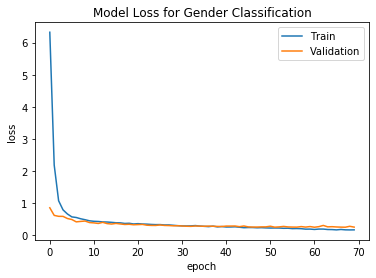

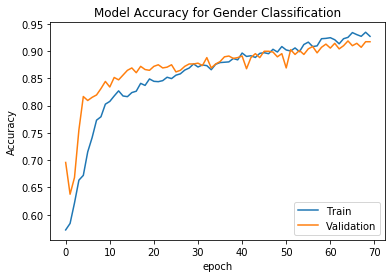

In [144]:
## plotting training and validation loss values of a network
import matplotlib.pyplot as plt
plt.plot(history_Gender.history['loss'])
plt.plot(history_Gender.history['val_loss'])
plt.title('Model Loss for Gender Classification')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

##plotting model accuracy
plt.plot(history_Gender.history['acc'])
plt.plot(history_Gender.history['val_acc'])
plt.title('Model Accuracy for Gender Classification')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

**Validation**

In [279]:
## Function to predict gender for bulk inputs
def Gender_validation(file):
    mfccs_scaled_features = MFCC_features_extractor(file)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=audio_model.predict_classes(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(predicted_label) 
    return prediction_class[0].split('.')[0]


## Function to predict gender for quick validations
def Quick_gender_validation(file):
    mfccs_scaled_features = MFCC_features_extractor(file)
    print('Extracting features from sample audio\n')
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    print(mfccs_scaled_features)
    print('\nSample audio fed to trained model')
    predicted_label=audio_model.predict_classes(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(predicted_label) 
    print('The model predicted that the audio sample is recorded by a ',prediction_class[0].split('.')[0],' participant')
    return prediction_class[0].split('.')[0]

In [282]:
i=0
songs_path='D:/ML_Audio_Datasets/ML_Audio_Data'
for index_num,row in (df_final_recordings_data.iterrows()):
    i=i+1
    print('Validation number ',i)
    file_name = os.path.join(os.path.abspath(songs_path), str(row["File_ID"]))
    print('')
    print('Participant ID',row["Participant"])
    print('Gender as in demographic_file -->',row["Gender"])
    Gender_predicted_by_model=Quick_gender_validation(file_name)
    #print('Gender Predicted by model',Gender_predicted_by_model)
    print('----------------------------------------------------------------------------------------------------------')
    
    if i > 5:
        break

Validation number  1

Participant ID S1
Gender as in demographic_file --> Male
Extracting features from sample audio

[[-5.70352051e+02  1.65223724e+02  1.18922043e+01  2.84639072e+01
  -6.41189873e-01  3.25961280e+00  1.15143261e+01 -7.24926472e+00
  -1.13000193e+01  6.72232211e-01  6.76146686e-01  1.52200632e+01
  -2.15310550e+00 -4.94472027e+00  1.21984076e+00  5.06100607e+00
   1.31517017e+00 -3.45893574e+00  1.21528339e+00 -3.15005875e+00
  -7.84098148e+00 -2.61745906e+00  4.45308149e-01 -5.58482742e+00
  -3.41788483e+00 -1.65800381e+00  1.64516973e+00 -8.47649574e-01
  -1.48330665e+00 -2.76453376e-01 -9.77288306e-01  1.14020325e-01
   8.78066540e-01  4.48233426e-01 -2.89784789e+00 -1.08550918e+00
  -2.14613080e+00 -4.06791791e-02 -3.37230235e-01 -1.92387962e+00]]

Sample audio fed to trained model
The model predicted that the audio sample is recorded by a  Male  participant
----------------------------------------------------------------------------------------------------------


**The below code snippet iterates through all the audio samples and predicts the participant gender of the recording. The output is fetched to a csv file which has a comparison of participant gender with original Demographic file and model predicted file. For reference, the output csv is attached along with the notebooks**

In [170]:
songs_path='D:/ML_Audio_Datasets/ML_Audio_Data'
gender_check = []
for index_num,row in tqdm(df_final_recordings_data.iterrows()):
    i=i+1
    file_name = os.path.join(os.path.abspath(songs_path), str(row["File_ID"]))
    print('')
    Participant_id = row["Participant"]
    Gender_as_in_demographic_file=row["Gender"]
    Gender_predicted_by_model=Gender_validation(file_name)
    gender_check.append([Participant_id,Gender_as_in_demographic_file,Gender_predicted_by_model])
gender_check_df=pd.DataFrame(gender_check, columns=['Participant_ID','Gender_as_in_demographic_file','Gender_predicted_by_model'])
gender_check_df.head()


0it [00:00, ?it/s]


1it [00:00,  3.56it/s]


2it [00:00,  3.62it/s]


3it [00:00,  3.72it/s]


4it [00:01,  3.70it/s]


5it [00:01,  3.59it/s]


6it [00:01,  3.35it/s]


7it [00:02,  3.26it/s]


8it [00:02,  3.24it/s]


9it [00:02,  3.23it/s]


10it [00:03,  3.04it/s]


11it [00:03,  3.13it/s]


12it [00:03,  3.30it/s]


13it [00:03,  3.37it/s]


14it [00:04,  3.48it/s]


15it [00:04,  3.56it/s]


16it [00:04,  3.50it/s]


17it [00:04,  3.64it/s]


18it [00:05,  2.92it/s]


19it [00:05,  3.04it/s]


20it [00:06,  3.04it/s]


21it [00:06,  3.18it/s]


22it [00:06,  3.23it/s]


23it [00:06,  3.32it/s]


24it [00:07,  3.39it/s]


25it [00:07,  3.49it/s]


26it [00:07,  3.63it/s]


27it [00:08,  3.43it/s]


28it [00:08,  3.26it/s]


29it [00:08,  3.34it/s]


30it [00:08,  3.35it/s]


31it [00:09,  3.20it/s]


32it [00:09,  3.15it/s]


33it [00:09,  3.31it/s]


34it [00:10,  3.43it/s]


35it [00:10,  3.40it/s]


36it [00:10,  3.51it/s]


37it [00:11,  3.41it/s]


38it [00:11,  3.10it/s]


39it [00:11,  3.13it/s]


40it [00:12,  3.15it/s]


41it [00:12,  3.17it/s]


42it [00:12,  3.22it/s]


43it [00:12,  3.37it/s]


44it [00:13,  3.48it/s]


45it [00:13,  3.56it/s]


46it [00:13,  3.39it/s]


47it [00:14,  3.49it/s]


48it [00:14,  3.63it/s]


49it [00:14,  3.49it/s]


50it [00:14,  3.50it/s]


51it [00:15,  3.58it/s]


52it [00:15,  3.63it/s]


53it [00:15,  3.61it/s]


54it [00:16,  3.59it/s]


55it [00:16,  3.52it/s]


56it [00:16,  3.47it/s]


57it [00:16,  3.68it/s]


58it [00:17,  3.84it/s]


59it [00:17,  3.82it/s]


60it [00:17,  3.81it/s]


61it [00:17,  3.80it/s]


62it [00:18,  3.79it/s]


63it [00:18,  3.47it/s]


64it [00:18,  3.16it/s]


65it [00:19,  3.17it/s]


66it [00:19,  3.28it/s]


67it [00:19,  3.30it/s]


68it [00:20,  3.38it/s]


69it [00:20,  3.48it/s]


70it [00:20,  3.62it/s]


71it [00:20,  3.73it/s]


72it [00:21,  3.88it/s]


73it [00:21,  3.84it/s]


74it [00:21,  3.89it/s]


75it [00:21,  3.65it/s]


76it [00:22,  3.62it/s]


77it [00:22,  3.66it/s]


78it [00:22,  3.63it/s]


79it [00:22,  3.67it/s]


80it [00:23,  3.63it/s]


81it [00:23,  3.61it/s]


82it [00:23,  3.59it/s]


83it [00:24,  3.58it/s]


84it [00:24,  3.52it/s]


85it [00:24,  3.36it/s]


86it [00:25,  3.26it/s]


87it [00:25,  3.14it/s]


88it [00:25,  3.11it/s]


89it [00:26,  3.15it/s]


90it [00:26,  3.07it/s]


91it [00:26,  3.20it/s]


92it [00:26,  3.30it/s]


93it [00:27,  3.30it/s]


94it [00:27,  3.08it/s]


95it [00:27,  3.03it/s]


96it [00:28,  2.95it/s]


97it [00:28,  3.15it/s]


98it [00:28,  3.26it/s]


99it [00:29,  3.20it/s]


100it [00:29,  3.14it/s]


101it [00:29,  3.19it/s]


102it [00:30,  3.34it/s]


103it [00:30,  3.25it/s]


104it [00:30,  3.19it/s]


105it [00:31,  3.14it/s]


106it [00:31,  3.11it/s]


107it [00:31,  3.17it/s]


108it [00:32,  3.21it/s]


109it [00:32,  3.07it/s]


110it [00:32,  2.99it/s]


111it [00:33,  3.07it/s]


112it [00:33,  3.11it/s]


113it [00:33,  2.51it/s]


114it [00:34,  2.46it/s]


115it [00:34,  2.54it/s]


116it [00:35,  2.58it/s]


117it [00:35,  2.57it/s]


118it [00:35,  2.69it/s]


119it [00:36,  2.90it/s]


120it [00:36,  2.94it/s]


121it [00:36,  2.91it/s]


122it [00:37,  3.00it/s]


123it [00:37,  2.85it/s]


124it [00:37,  2.72it/s]


125it [00:38,  2.93it/s]


126it [00:38,  3.05it/s]


127it [00:38,  3.13it/s]


128it [00:39,  3.25it/s]


129it [00:39,  3.23it/s]


130it [00:39,  3.17it/s]


131it [00:40,  3.18it/s]


132it [00:40,  3.21it/s]


133it [00:40,  3.25it/s]


134it [00:40,  3.29it/s]


135it [00:41,  3.31it/s]


136it [00:41,  3.20it/s]


137it [00:41,  3.15it/s]


138it [00:42,  3.12it/s]


139it [00:42,  3.14it/s]


140it [00:42,  3.20it/s]


141it [00:43,  3.15it/s]


142it [00:43,  3.08it/s]


143it [00:43,  3.02it/s]


144it [00:44,  2.94it/s]


145it [00:44,  3.05it/s]


146it [00:44,  3.14it/s]


147it [00:45,  3.21it/s]


148it [00:45,  3.16it/s]


149it [00:45,  3.17it/s]


150it [00:45,  3.27it/s]


151it [00:46,  3.35it/s]


152it [00:46,  3.26it/s]


153it [00:46,  3.19it/s]


154it [00:47,  3.24it/s]


155it [00:47,  3.18it/s]


156it [00:47,  3.18it/s]


157it [00:48,  3.14it/s]


158it [00:48,  3.16it/s]


159it [00:48,  3.18it/s]


160it [00:49,  3.17it/s]


161it [00:49,  3.16it/s]


162it [00:49,  3.21it/s]


163it [00:50,  3.21it/s]


164it [00:50,  3.21it/s]


165it [00:50,  3.15it/s]


166it [00:51,  3.08it/s]


167it [00:51,  3.07it/s]


168it [00:51,  3.15it/s]


169it [00:51,  3.21it/s]


170it [00:52,  3.23it/s]


171it [00:52,  3.27it/s]


172it [00:52,  3.35it/s]


173it [00:53,  3.40it/s]


174it [00:53,  3.39it/s]


175it [00:53,  3.42it/s]


176it [00:54,  3.41it/s]


177it [00:54,  3.45it/s]


178it [00:54,  3.48it/s]


179it [00:54,  3.23it/s]


180it [00:55,  3.18it/s]


181it [00:55,  3.18it/s]


182it [00:55,  3.19it/s]


183it [00:56,  3.10it/s]


184it [00:56,  3.17it/s]


185it [00:56,  3.05it/s]


186it [00:57,  2.92it/s]


187it [00:57,  2.77it/s]


188it [00:58,  2.85it/s]


189it [00:58,  2.90it/s]


190it [00:58,  2.89it/s]


191it [00:58,  3.02it/s]


192it [00:59,  3.03it/s]


193it [00:59,  2.97it/s]


194it [00:59,  3.12it/s]


195it [01:00,  3.29it/s]


196it [01:00,  3.31it/s]


197it [01:00,  3.27it/s]


198it [01:01,  2.98it/s]


199it [01:01,  2.68it/s]


200it [01:01,  2.87it/s]


201it [01:02,  3.00it/s]


202it [01:02,  3.01it/s]


203it [01:02,  3.02it/s]


204it [01:03,  3.03it/s]


205it [01:03,  3.03it/s]


206it [01:03,  3.22it/s]


207it [01:04,  3.22it/s]


208it [01:04,  3.12it/s]


209it [01:04,  3.05it/s]


210it [01:05,  3.18it/s]


211it [01:05,  3.22it/s]


212it [01:05,  2.76it/s]


213it [01:06,  2.48it/s]


214it [01:06,  2.59it/s]


215it [01:07,  2.64it/s]


216it [01:07,  2.83it/s]


217it [01:07,  2.97it/s]


218it [01:08,  3.12it/s]


219it [01:08,  3.29it/s]


220it [01:08,  3.31it/s]


221it [01:08,  3.44it/s]


222it [01:09,  3.16it/s]


223it [01:09,  2.91it/s]


224it [01:09,  3.04it/s]


225it [01:10,  3.08it/s]


226it [01:10,  3.47it/s]


227it [01:10,  3.56it/s]


228it [01:11,  3.39it/s]


229it [01:11,  3.33it/s]


230it [01:11,  3.24it/s]


231it [01:12,  3.13it/s]


232it [01:12,  2.64it/s]


233it [01:13,  2.35it/s]


234it [01:13,  2.55it/s]


235it [01:13,  2.71it/s]


236it [01:13,  2.86it/s]


237it [01:14,  2.92it/s]


238it [01:14,  3.05it/s]


239it [01:14,  3.14it/s]


240it [01:15,  3.11it/s]


241it [01:15,  3.05it/s]


242it [01:15,  3.05it/s]


243it [01:16,  3.05it/s]


244it [01:16,  3.18it/s]


245it [01:16,  3.23it/s]


246it [01:17,  3.22it/s]


247it [01:17,  3.21it/s]


248it [01:17,  3.16it/s]


249it [01:18,  3.17it/s]


250it [01:18,  3.18it/s]


251it [01:18,  3.14it/s]


252it [01:19,  2.94it/s]


253it [01:19,  2.88it/s]


254it [01:19,  3.02it/s]


255it [01:20,  3.06it/s]


256it [01:20,  3.24it/s]


257it [01:20,  3.38it/s]


258it [01:20,  3.37it/s]


259it [01:21,  3.37it/s]


260it [01:21,  3.47it/s]


261it [01:21,  3.55it/s]


262it [01:22,  3.49it/s]


263it [01:22,  3.46it/s]


264it [01:22,  3.37it/s]


265it [01:22,  3.32it/s]


266it [01:23,  3.33it/s]


267it [01:23,  3.29it/s]


268it [01:23,  3.32it/s]


269it [01:24,  3.18it/s]


270it [01:24,  3.19it/s]


271it [01:24,  3.14it/s]


272it [01:25,  3.16it/s]


273it [01:25,  3.13it/s]


274it [01:25,  2.93it/s]


275it [01:26,  2.96it/s]


276it [01:26,  2.82it/s]


277it [01:26,  2.77it/s]


278it [01:27,  2.74it/s]


279it [01:27,  2.86it/s]


280it [01:28,  2.78it/s]


281it [01:28,  2.89it/s]


282it [01:28,  3.06it/s]


283it [01:28,  3.20it/s]


284it [01:29,  3.15it/s]


285it [01:29,  3.12it/s]


286it [01:29,  2.97it/s]


287it [01:30,  2.83it/s]


288it [01:30,  2.84it/s]


289it [01:31,  2.86it/s]


290it [01:31,  2.80it/s]


291it [01:31,  2.79it/s]


292it [01:32,  2.90it/s]


293it [01:32,  3.03it/s]


294it [01:32,  3.22it/s]


295it [01:32,  3.31it/s]


296it [01:33,  3.23it/s]


297it [01:33,  3.18it/s]


298it [01:33,  3.16it/s]


299it [01:34,  3.03it/s]


300it [01:34,  3.13it/s]


301it [01:34,  3.20it/s]


302it [01:35,  3.06it/s]


303it [01:35,  3.05it/s]


304it [01:35,  3.14it/s]


305it [01:36,  3.26it/s]


306it [01:36,  3.34it/s]


307it [01:36,  3.35it/s]


308it [01:37,  3.30it/s]


309it [01:37,  2.83it/s]


310it [01:37,  2.85it/s]


311it [01:38,  2.83it/s]


312it [01:38,  2.97it/s]


313it [01:38,  3.03it/s]


314it [01:39,  3.12it/s]


315it [01:39,  3.15it/s]


316it [01:39,  3.16it/s]


317it [01:40,  3.17it/s]


318it [01:40,  3.18it/s]


319it [01:40,  3.13it/s]


320it [01:41,  3.11it/s]


321it [01:41,  3.04it/s]


322it [01:41,  3.09it/s]


323it [01:42,  3.07it/s]


324it [01:42,  3.06it/s]


325it [01:42,  3.15it/s]


326it [01:42,  3.16it/s]


327it [01:43,  3.16it/s]


328it [01:43,  3.17it/s]


329it [01:43,  3.22it/s]


330it [01:44,  3.42it/s]


331it [01:44,  3.64it/s]


332it [01:44,  3.29it/s]


333it [01:45,  3.22it/s]


334it [01:45,  3.21it/s]


335it [01:45,  3.20it/s]


336it [01:45,  3.25it/s]


337it [01:46,  3.28it/s]


338it [01:46,  3.16it/s]


339it [01:46,  3.08it/s]


340it [01:47,  3.21it/s]


341it [01:47,  3.36it/s]


342it [01:47,  3.31it/s]


343it [01:48,  3.28it/s]


344it [01:48,  3.41it/s]


345it [01:48,  3.40it/s]


346it [01:49,  3.05it/s]


347it [01:49,  2.84it/s]


348it [01:49,  2.90it/s]


349it [01:50,  3.07it/s]


350it [01:50,  3.02it/s]


351it [01:50,  2.99it/s]


352it [01:51,  3.09it/s]


353it [01:51,  3.27it/s]


354it [01:51,  3.33it/s]


355it [01:51,  3.39it/s]


356it [01:52,  3.39it/s]


357it [01:52,  3.28it/s]


358it [01:52,  3.02it/s]


359it [01:53,  2.91it/s]


360it [01:53,  2.96it/s]


361it [01:54,  2.90it/s]


362it [01:54,  3.07it/s]


363it [01:54,  3.15it/s]


364it [01:54,  3.08it/s]


365it [01:55,  2.94it/s]


366it [01:55,  3.05it/s]


367it [01:55,  3.14it/s]


368it [01:56,  3.16it/s]


369it [01:56,  3.12it/s]


370it [01:56,  3.15it/s]


371it [01:57,  3.07it/s]


372it [01:57,  3.06it/s]


373it [01:57,  2.97it/s]


374it [01:58,  3.08it/s]


375it [01:58,  3.16it/s]


376it [01:58,  3.17it/s]


377it [01:59,  3.23it/s]


378it [01:59,  2.93it/s]


379it [01:59,  2.77it/s]


380it [02:00,  2.93it/s]


381it [02:00,  3.09it/s]


382it [02:00,  3.08it/s]


383it [02:01,  3.16it/s]


384it [02:01,  3.27it/s]


385it [02:01,  3.43it/s]


386it [02:01,  3.36it/s]


387it [02:02,  3.26it/s]


388it [02:02,  3.19it/s]


389it [02:02,  3.10it/s]


390it [02:03,  3.13it/s]


391it [02:03,  3.20it/s]


392it [02:03,  3.02it/s]


393it [02:04,  2.83it/s]


394it [02:04,  2.84it/s]


395it [02:05,  2.90it/s]


396it [02:05,  2.36it/s]


397it [02:06,  2.27it/s]


398it [02:06,  2.47it/s]


399it [02:06,  2.61it/s]


400it [02:07,  2.63it/s]


401it [02:07,  2.60it/s]


402it [02:07,  2.62it/s]


403it [02:08,  2.63it/s]


404it [02:08,  2.64it/s]


405it [02:09,  2.72it/s]


406it [02:09,  2.57it/s]


407it [02:09,  2.55it/s]


408it [02:10,  2.68it/s]


409it [02:10,  2.74it/s]


410it [02:10,  2.83it/s]


411it [02:11,  2.93it/s]


412it [02:11,  3.01it/s]


413it [02:11,  3.01it/s]


414it [02:12,  2.98it/s]


415it [02:12,  3.09it/s]


416it [02:12,  3.12it/s]


417it [02:13,  3.10it/s]


418it [02:13,  3.03it/s]


419it [02:13,  2.94it/s]


420it [02:14,  2.85it/s]


421it [02:14,  2.91it/s]


422it [02:14,  2.95it/s]


423it [02:15,  2.97it/s]


424it [02:15,  2.95it/s]


425it [02:15,  2.86it/s]


426it [02:16,  2.84it/s]


427it [02:16,  2.75it/s]


428it [02:17,  2.72it/s]


429it [02:17,  2.74it/s]


430it [02:17,  2.86it/s]


431it [02:18,  2.80it/s]


432it [02:18,  2.83it/s]


433it [02:18,  3.01it/s]


434it [02:18,  3.21it/s]


435it [02:19,  3.02it/s]


436it [02:19,  2.95it/s]


437it [02:20,  2.91it/s]


438it [02:20,  2.91it/s]


439it [02:20,  2.87it/s]


440it [02:21,  2.96it/s]


441it [02:21,  2.94it/s]


442it [02:21,  2.97it/s]


443it [02:22,  3.01it/s]


444it [02:22,  2.98it/s]


445it [02:22,  2.90it/s]


446it [02:23,  2.86it/s]


447it [02:23,  2.76it/s]


448it [02:23,  2.73it/s]


449it [02:24,  2.68it/s]


450it [02:24,  2.76it/s]


451it [02:24,  2.90it/s]


452it [02:25,  2.99it/s]


453it [02:25,  3.01it/s]


454it [02:25,  3.02it/s]


455it [02:26,  3.07it/s]


456it [02:26,  3.11it/s]


457it [02:26,  3.04it/s]


458it [02:27,  3.00it/s]


459it [02:27,  3.10it/s]


460it [02:27,  3.09it/s]


461it [02:28,  2.90it/s]


462it [02:28,  2.84it/s]


463it [02:28,  2.91it/s]


464it [02:29,  2.91it/s]


465it [02:29,  2.79it/s]


466it [02:30,  2.68it/s]


467it [02:30,  2.64it/s]


468it [02:30,  2.68it/s]


469it [02:31,  2.83it/s]


470it [02:31,  2.58it/s]


471it [02:31,  2.60it/s]


472it [02:32,  2.65it/s]


473it [02:32,  2.76it/s]


474it [02:33,  2.65it/s]


475it [02:33,  2.53it/s]


476it [02:33,  2.51it/s]


477it [02:34,  2.72it/s]


478it [02:34,  2.84it/s]


479it [02:34,  2.98it/s]


480it [02:35,  3.07it/s]


481it [02:35,  2.82it/s]


482it [02:35,  2.79it/s]


483it [02:36,  2.88it/s]


484it [02:36,  3.03it/s]


485it [02:36,  2.95it/s]


486it [02:37,  2.97it/s]


487it [02:37,  3.11it/s]


488it [02:37,  3.28it/s]


489it [02:38,  3.07it/s]


490it [02:38,  3.11it/s]


491it [02:38,  2.92it/s]


492it [02:39,  2.91it/s]


493it [02:39,  2.99it/s]


494it [02:39,  3.05it/s]


495it [02:40,  2.86it/s]


496it [02:40,  2.70it/s]


497it [02:41,  2.62it/s]


498it [02:41,  2.61it/s]


499it [02:41,  2.69it/s]


500it [02:42,  2.86it/s]


501it [02:42,  3.09it/s]


502it [02:42,  3.21it/s]


503it [02:42,  3.21it/s]


504it [02:43,  3.22it/s]


505it [02:43,  3.03it/s]


506it [02:44,  2.87it/s]


507it [02:44,  2.85it/s]


508it [02:44,  2.83it/s]


509it [02:45,  2.81it/s]


510it [02:45,  2.83it/s]


511it [02:45,  2.72it/s]


512it [02:46,  2.85it/s]


513it [02:46,  2.87it/s]


514it [02:46,  2.84it/s]


515it [02:47,  2.43it/s]


516it [02:47,  2.20it/s]


517it [02:48,  2.39it/s]


518it [02:48,  2.56it/s]


519it [02:48,  2.71it/s]


520it [02:49,  2.91it/s]


521it [02:49,  2.95it/s]


522it [02:49,  2.94it/s]


523it [02:50,  2.97it/s]


524it [02:50,  3.02it/s]


525it [02:50,  3.07it/s]


526it [02:51,  3.11it/s]


527it [02:51,  3.18it/s]


528it [02:51,  3.18it/s]


529it [02:52,  3.23it/s]


530it [02:52,  3.22it/s]


531it [02:52,  3.21it/s]


532it [02:53,  3.11it/s]


533it [02:53,  3.09it/s]


534it [02:53,  3.08it/s]


535it [02:54,  3.07it/s]


536it [02:54,  3.06it/s]


537it [02:54,  3.06it/s]


538it [02:55,  2.97it/s]


539it [02:55,  3.12it/s]


540it [02:55,  3.29it/s]


541it [02:55,  3.23it/s]


542it [02:56,  3.20it/s]


543it [02:56,  3.11it/s]


544it [02:56,  3.14it/s]


545it [02:57,  3.20it/s]


546it [02:57,  3.25it/s]


547it [02:57,  3.25it/s]


548it [02:58,  3.22it/s]


549it [02:58,  3.26it/s]


550it [02:58,  3.29it/s]


551it [02:58,  3.31it/s]


552it [02:59,  3.36it/s]


553it [02:59,  3.31it/s]


554it [02:59,  3.14it/s]


555it [03:00,  3.02it/s]


556it [03:00,  3.03it/s]


557it [03:00,  3.26it/s]


558it [03:01,  3.40it/s]


559it [03:01,  3.14it/s]


560it [03:01,  3.02it/s]


561it [03:02,  3.16it/s]


562it [03:02,  3.32it/s]


563it [03:02,  3.28it/s]


564it [03:03,  3.22it/s]


565it [03:03,  2.92it/s]


566it [03:03,  2.91it/s]


567it [03:04,  2.88it/s]


568it [03:04,  2.78it/s]


569it [03:05,  2.60it/s]


570it [03:05,  2.56it/s]


571it [03:05,  2.50it/s]


572it [03:06,  2.51it/s]


573it [03:06,  2.62it/s]


574it [03:06,  2.59it/s]


575it [03:07,  2.76it/s]


576it [03:07,  2.63it/s]


577it [03:08,  2.77it/s]


578it [03:08,  2.76it/s]


579it [03:08,  2.83it/s]


580it [03:09,  2.89it/s]


581it [03:09,  2.97it/s]


582it [03:09,  3.01it/s]


583it [03:09,  3.15it/s]


584it [03:10,  3.15it/s]


585it [03:10,  3.21it/s]


586it [03:11,  2.65it/s]


587it [03:11,  2.68it/s]


588it [03:11,  2.82it/s]


589it [03:12,  2.92it/s]


590it [03:12,  3.04it/s]


591it [03:12,  2.88it/s]


592it [03:13,  3.01it/s]


593it [03:13,  3.04it/s]


594it [03:13,  3.11it/s]


595it [03:14,  3.19it/s]


596it [03:14,  2.97it/s]


597it [03:14,  2.99it/s]


598it [03:15,  3.09it/s]


599it [03:15,  3.03it/s]


600it [03:15,  3.06it/s]


601it [03:16,  3.00it/s]


602it [03:16,  3.02it/s]


603it [03:16,  3.03it/s]


604it [03:17,  2.76it/s]


605it [03:17,  2.80it/s]


606it [03:17,  2.91it/s]


607it [03:18,  2.99it/s]


608it [03:18,  2.97it/s]


609it [03:18,  2.91it/s]


610it [03:19,  2.95it/s]


611it [03:19,  2.94it/s]


612it [03:19,  3.01it/s]


613it [03:20,  2.98it/s]


614it [03:20,  3.00it/s]


615it [03:20,  2.97it/s]


616it [03:21,  2.99it/s]


617it [03:21,  3.00it/s]


618it [03:21,  3.01it/s]


619it [03:22,  2.88it/s]


620it [03:22,  2.95it/s]


621it [03:22,  3.11it/s]


622it [03:23,  3.04it/s]


623it [03:23,  3.13it/s]


624it [03:23,  3.06it/s]


625it [03:24,  3.02it/s]


626it [03:24,  3.02it/s]


627it [03:24,  3.12it/s]


628it [03:25,  3.10it/s]


629it [03:25,  3.06it/s]


630it [03:25,  3.15it/s]


631it [03:25,  3.24it/s]


632it [03:26,  3.22it/s]


633it [03:26,  3.26it/s]


634it [03:26,  3.20it/s]


635it [03:27,  2.97it/s]


636it [03:27,  2.91it/s]


637it [03:27,  2.99it/s]


638it [03:28,  3.01it/s]


639it [03:28,  3.02it/s]


640it [03:28,  3.03it/s]


641it [03:29,  3.08it/s]


642it [03:29,  2.96it/s]


643it [03:29,  3.08it/s]


644it [03:30,  3.13it/s]


645it [03:30,  3.14it/s]


646it [03:30,  3.20it/s]


647it [03:31,  3.20it/s]


648it [03:31,  3.25it/s]


649it [03:31,  3.09it/s]


650it [03:32,  3.17it/s]


651it [03:32,  3.28it/s]


652it [03:32,  3.25it/s]


653it [03:33,  3.29it/s]


654it [03:33,  3.23it/s]


655it [03:33,  3.29it/s]


656it [03:33,  3.21it/s]


657it [03:34,  3.26it/s]


658it [03:34,  3.21it/s]


659it [03:34,  3.26it/s]


660it [03:35,  3.19it/s]


661it [03:35,  3.22it/s]


662it [03:35,  3.33it/s]


663it [03:36,  3.28it/s]


664it [03:36,  3.26it/s]


665it [03:36,  3.29it/s]


666it [03:37,  3.34it/s]


667it [03:37,  3.31it/s]


668it [03:37,  3.28it/s]


669it [03:37,  3.26it/s]


670it [03:38,  3.29it/s]


671it [03:38,  3.15it/s]


672it [03:38,  3.24it/s]


673it [03:39,  3.17it/s]


674it [03:39,  3.13it/s]


675it [03:39,  3.11it/s]


676it [03:40,  2.92it/s]


677it [03:40,  3.09it/s]


678it [03:40,  3.07it/s]


679it [03:41,  3.05it/s]


680it [03:41,  3.14it/s]


681it [03:41,  2.80it/s]


682it [03:42,  2.81it/s]


683it [03:42,  3.00it/s]


684it [03:42,  3.06it/s]


685it [03:43,  3.05it/s]


686it [03:43,  3.10it/s]


687it [03:43,  3.08it/s]


688it [03:44,  3.07it/s]


689it [03:44,  3.15it/s]


690it [03:44,  3.12it/s]


691it [03:45,  3.12it/s]


692it [03:45,  3.14it/s]


693it [03:45,  3.21it/s]


694it [03:46,  3.16it/s]


695it [03:46,  3.12it/s]


696it [03:46,  3.06it/s]


697it [03:47,  3.09it/s]


698it [03:47,  3.12it/s]


699it [03:47,  3.10it/s]


700it [03:47,  3.18it/s]


701it [03:48,  3.28it/s]


702it [03:48,  3.36it/s]


703it [03:48,  3.36it/s]


704it [03:49,  3.21it/s]


705it [03:49,  3.21it/s]


706it [03:49,  3.10it/s]


707it [03:50,  2.94it/s]


708it [03:50,  3.07it/s]


709it [03:50,  2.82it/s]


710it [03:51,  2.77it/s]


711it [03:51,  2.81it/s]


712it [03:52,  2.70it/s]


713it [03:52,  2.79it/s]


714it [03:52,  2.75it/s]


715it [03:53,  2.62it/s]


716it [03:53,  2.66it/s]


717it [03:53,  2.77it/s]


718it [03:54,  2.67it/s]


719it [03:54,  2.57it/s]


720it [03:55,  2.66it/s]


721it [03:55,  2.66it/s]


722it [03:55,  2.76it/s]


723it [03:56,  2.73it/s]


724it [03:56,  2.93it/s]


725it [03:56,  3.14it/s]


726it [03:57,  3.14it/s]


727it [03:57,  3.05it/s]


728it [03:57,  3.06it/s]


729it [03:58,  3.02it/s]


730it [03:58,  3.03it/s]


731it [03:58,  3.03it/s]


732it [03:59,  3.03it/s]


733it [03:59,  2.98it/s]


734it [03:59,  3.03it/s]


735it [03:59,  3.08it/s]


736it [04:00,  2.98it/s]


737it [04:00,  3.04it/s]


738it [04:00,  3.04it/s]


739it [04:01,  3.13it/s]


740it [04:01,  3.11it/s]


741it [04:01,  3.09it/s]


742it [04:02,  3.12it/s]


743it [04:02,  3.05it/s]


744it [04:02,  3.10it/s]


745it [04:03,  3.00it/s]


746it [04:03,  3.00it/s]


747it [04:03,  2.96it/s]


748it [04:04,  2.94it/s]


749it [04:04,  2.97it/s]


750it [04:04,  2.90it/s]


751it [04:05,  2.75it/s]


752it [04:05,  2.83it/s]


753it [04:06,  2.78it/s]


754it [04:06,  2.82it/s]


755it [04:06,  3.09it/s]


756it [04:06,  3.22it/s]


757it [04:07,  2.96it/s]


758it [04:07,  3.29it/s]


759it [04:07,  3.48it/s]


760it [04:08,  3.56it/s]


761it [04:08,  3.62it/s]


762it [04:08,  3.42it/s]


763it [04:08,  3.77it/s]


764it [04:09,  3.83it/s]


765it [04:09,  3.88it/s]


766it [04:09,  3.64it/s]


767it [04:10,  3.35it/s]


768it [04:10,  3.17it/s]


769it [04:10,  3.10it/s]


770it [04:11,  3.04it/s]


771it [04:11,  3.00it/s]


772it [04:11,  3.06it/s]


773it [04:12,  3.01it/s]


774it [04:12,  3.02it/s]


775it [04:12,  3.03it/s]


776it [04:13,  3.06it/s]


777it [04:13,  3.10it/s]


778it [04:13,  3.13it/s]


779it [04:14,  3.10it/s]


780it [04:14,  3.04it/s]


781it [04:14,  3.09it/s]


782it [04:14,  3.21it/s]


783it [04:15,  3.21it/s]


784it [04:15,  2.96it/s]


785it [04:16,  3.07it/s]


786it [04:16,  3.20it/s]


787it [04:16,  2.94it/s]


788it [04:17,  2.85it/s]


789it [04:17,  2.91it/s]


790it [04:17,  2.95it/s]


791it [04:18,  2.98it/s]


792it [04:18,  3.04it/s]


793it [04:18,  3.04it/s]


794it [04:19,  3.03it/s]


795it [04:19,  2.99it/s]


796it [04:19,  3.04it/s]


797it [04:20,  3.03it/s]


798it [04:20,  3.08it/s]


799it [04:20,  3.12it/s]


800it [04:20,  3.10it/s]


801it [04:21,  3.13it/s]


802it [04:21,  3.10it/s]


803it [04:21,  3.38it/s]


804it [04:22,  3.17it/s]


805it [04:22,  3.33it/s]


806it [04:22,  3.63it/s]


807it [04:22,  3.60it/s]


808it [04:23,  3.36it/s]


809it [04:23,  3.47it/s]


810it [04:23,  3.38it/s]


811it [04:24,  2.95it/s]


812it [04:24,  2.58it/s]


813it [04:25,  2.61it/s]


814it [04:25,  2.56it/s]


815it [04:25,  2.62it/s]


816it [04:26,  2.70it/s]


817it [04:26,  2.51it/s]


818it [04:27,  2.50it/s]


819it [04:27,  2.61it/s]


820it [04:28,  2.12it/s]


821it [04:28,  2.39it/s]


822it [04:28,  2.55it/s]


823it [04:29,  2.71it/s]


824it [04:29,  2.84it/s]


825it [04:29,  2.98it/s]


826it [04:30,  3.04it/s]


827it [04:30,  2.84it/s]


828it [04:30,  2.81it/s]


829it [04:31,  2.80it/s]


830it [04:31,  2.87it/s]


831it [04:31,  2.88it/s]


832it [04:32,  2.88it/s]


833it [04:32,  2.97it/s]


834it [04:32,  2.91it/s]


835it [04:33,  3.02it/s]


836it [04:33,  3.07it/s]


837it [04:33,  3.11it/s]


838it [04:34,  3.05it/s]


839it [04:34,  3.23it/s]


840it [04:34,  3.22it/s]


841it [04:35,  3.32it/s]


842it [04:35,  3.44it/s]


843it [04:35,  3.36it/s]


844it [04:35,  3.59it/s]


845it [04:36,  3.64it/s]


846it [04:36,  3.38it/s]


847it [04:36,  3.43it/s]


848it [04:36,  3.83it/s]


849it [04:37,  3.81it/s]


850it [04:37,  3.55it/s]


851it [04:37,  3.38it/s]


852it [04:38,  3.43it/s]


853it [04:38,  3.31it/s]


854it [04:38,  3.09it/s]


855it [04:39,  3.10it/s]


856it [04:39,  3.04it/s]


857it [04:39,  3.13it/s]


858it [04:40,  3.09it/s]


859it [04:40,  3.09it/s]


860it [04:40,  3.17it/s]


861it [04:41,  3.23it/s]


862it [04:41,  3.22it/s]


863it [04:41,  3.16it/s]


864it [04:42,  3.04it/s]


865it [04:42,  3.00it/s]


866it [04:42,  2.97it/s]


867it [04:43,  2.95it/s]


868it [04:43,  2.98it/s]


869it [04:43,  3.00it/s]


870it [04:44,  3.06it/s]


871it [04:44,  2.95it/s]


872it [04:44,  3.06it/s]


873it [04:45,  3.05it/s]


874it [04:45,  2.87it/s]


875it [04:45,  2.86it/s]


876it [04:46,  2.57it/s]


877it [04:46,  2.66it/s]


878it [04:47,  2.60it/s]


879it [04:47,  2.53it/s]


880it [04:47,  2.49it/s]


881it [04:48,  2.44it/s]


882it [04:48,  2.47it/s]


883it [04:49,  2.48it/s]


884it [04:49,  2.50it/s]


885it [04:49,  2.35it/s]


886it [04:50,  2.33it/s]


887it [04:50,  2.49it/s]


888it [04:51,  2.60it/s]


889it [04:51,  2.72it/s]


890it [04:51,  2.77it/s]


891it [04:52,  2.85it/s]


892it [04:52,  2.98it/s]


893it [04:52,  2.97it/s]


894it [04:53,  2.99it/s]


895it [04:53,  3.05it/s]


896it [04:53,  3.09it/s]


897it [04:53,  3.08it/s]


898it [04:54,  3.20it/s]


899it [04:54,  3.11it/s]


900it [04:54,  3.04it/s]


901it [04:55,  3.07it/s]


902it [04:55,  3.06it/s]


903it [04:55,  3.06it/s]


904it [04:56,  3.10it/s]


905it [04:56,  3.04it/s]


906it [04:56,  3.04it/s]


907it [04:57,  3.08it/s]


908it [04:57,  3.09it/s]


909it [04:57,  3.08it/s]


910it [04:58,  3.11it/s]


911it [04:58,  3.09it/s]


912it [04:58,  3.17it/s]


913it [04:59,  3.09it/s]


914it [04:59,  3.21it/s]


915it [04:59,  3.24it/s]


916it [05:00,  3.28it/s]


917it [05:00,  3.36it/s]


918it [05:00,  3.41it/s]


919it [05:00,  3.35it/s]


920it [05:01,  3.30it/s]


921it [05:01,  3.22it/s]


922it [05:01,  3.26it/s]


923it [05:02,  2.78it/s]


924it [05:02,  2.93it/s]


925it [05:03,  2.69it/s]


926it [05:03,  2.53it/s]


927it [05:03,  2.82it/s]


928it [05:04,  3.01it/s]


929it [05:04,  3.25it/s]


930it [05:04,  2.89it/s]


931it [05:05,  2.61it/s]


932it [05:05,  2.84it/s]


933it [05:06,  2.46it/s]


934it [05:06,  2.55it/s]


935it [05:06,  2.58it/s]


936it [05:07,  2.70it/s]


937it [05:07,  2.97it/s]


938it [05:07,  3.03it/s]


939it [05:07,  3.22it/s]


940it [05:08,  3.21it/s]


941it [05:08,  3.47it/s]


942it [05:08,  3.43it/s]


943it [05:09,  3.46it/s]


944it [05:09,  3.49it/s]


945it [05:09,  3.51it/s]


946it [05:09,  3.41it/s]


947it [05:10,  3.10it/s]


948it [05:10,  3.18it/s]


949it [05:10,  3.13it/s]


950it [05:11,  3.06it/s]


951it [05:11,  3.06it/s]


952it [05:11,  3.05it/s]


953it [05:12,  3.05it/s]


954it [05:12,  2.97it/s]


955it [05:12,  3.04it/s]


956it [05:13,  2.99it/s]


957it [05:13,  3.03it/s]


958it [05:13,  3.08it/s]


959it [05:14,  3.21it/s]


960it [05:14,  3.07it/s]


961it [05:14,  3.15it/s]


962it [05:15,  3.21it/s]


963it [05:15,  3.36it/s]


964it [05:15,  3.20it/s]


965it [05:16,  3.25it/s]


966it [05:16,  3.28it/s]


967it [05:16,  3.28it/s]


968it [05:17,  3.11it/s]


969it [05:17,  3.14it/s]


970it [05:17,  3.09it/s]


971it [05:18,  3.07it/s]


972it [05:18,  3.06it/s]


973it [05:18,  3.00it/s]


974it [05:19,  2.97it/s]


975it [05:19,  2.95it/s]


976it [05:19,  2.88it/s]


977it [05:20,  2.84it/s]


978it [05:20,  2.88it/s]


979it [05:20,  2.93it/s]


980it [05:21,  2.85it/s]


981it [05:21,  2.88it/s]


982it [05:21,  2.93it/s]


983it [05:22,  2.96it/s]


984it [05:22,  2.96it/s]


985it [05:22,  2.91it/s]


986it [05:23,  2.99it/s]


987it [05:23,  2.66it/s]


988it [05:24,  2.58it/s]


989it [05:24,  2.64it/s]


990it [05:24,  2.68it/s]


991it [05:25,  2.64it/s]


992it [05:25,  2.55it/s]


993it [05:25,  2.56it/s]


994it [05:26,  2.56it/s]


995it [05:26,  2.62it/s]


996it [05:27,  2.63it/s]


997it [05:27,  2.61it/s]


998it [05:27,  2.50it/s]


999it [05:28,  2.59it/s]


1000it [05:28,  2.59it/s]


1001it [05:29,  2.51it/s]


1002it [05:29,  2.55it/s]


1003it [05:29,  2.55it/s]


1004it [05:30,  2.63it/s]


1005it [05:30,  2.61it/s]


1006it [05:30,  2.61it/s]


1007it [05:31,  2.69it/s]


1008it [05:31,  2.79it/s]


1009it [05:32,  2.79it/s]


1010it [05:32,  2.75it/s]


1011it [05:32,  2.87it/s]


1012it [05:33,  2.92it/s]


1013it [05:33,  2.87it/s]


1014it [05:33,  2.87it/s]


1015it [05:34,  2.88it/s]


1016it [05:34,  2.81it/s]


1017it [05:34,  2.80it/s]


1018it [05:35,  2.47it/s]


1019it [05:35,  2.36it/s]


1020it [05:36,  2.50it/s]


1021it [05:36,  2.46it/s]


1022it [05:37,  2.38it/s]


1023it [05:37,  2.46it/s]


1024it [05:37,  2.55it/s]


1025it [05:38,  2.55it/s]


1026it [05:38,  2.65it/s]


1027it [05:38,  2.72it/s]


1028it [05:39,  2.81it/s]


1029it [05:39,  2.66it/s]


1030it [05:39,  2.74it/s]


1031it [05:40,  2.91it/s]


1032it [05:40,  2.95it/s]


1033it [05:40,  2.90it/s]


1034it [05:41,  2.79it/s]


1035it [05:41,  2.86it/s]


1036it [05:41,  2.91it/s]


1037it [05:42,  2.90it/s]


1038it [05:42,  2.76it/s]


1039it [05:43,  2.66it/s]


1040it [05:43,  2.59it/s]


1041it [05:43,  2.68it/s]


1042it [05:44,  2.67it/s]


1043it [05:44,  2.61it/s]


1044it [05:44,  2.75it/s]


1045it [05:45,  2.73it/s]


1046it [05:45,  2.78it/s]


1047it [05:46,  2.89it/s]


1048it [05:46,  2.68it/s]


1049it [05:46,  2.78it/s]


1050it [05:47,  2.83it/s]


1051it [05:47,  2.63it/s]


1052it [05:47,  2.73it/s]


1053it [05:48,  2.81it/s]


1054it [05:48,  2.80it/s]


1055it [05:48,  2.99it/s]


1056it [05:49,  3.10it/s]


1057it [05:49,  3.08it/s]


1058it [05:49,  3.21it/s]


1059it [05:50,  3.25it/s]


1060it [05:50,  3.14it/s]


1061it [05:50,  3.21it/s]


1062it [05:51,  3.21it/s]


1063it [05:51,  3.25it/s]


1064it [05:51,  3.24it/s]


1065it [05:51,  3.27it/s]


1066it [05:52,  3.20it/s]


1067it [05:52,  2.89it/s]


1068it [05:53,  2.90it/s]


1069it [05:53,  2.86it/s]


1070it [05:53,  2.93it/s]


1071it [05:54,  2.92it/s]


1072it [05:54,  2.92it/s]


1073it [05:54,  2.91it/s]


1074it [05:55,  2.95it/s]


1075it [05:55,  2.94it/s]


1076it [05:55,  2.96it/s]


1077it [05:56,  3.01it/s]


1078it [05:56,  2.96it/s]


1079it [05:56,  2.62it/s]


1080it [05:57,  2.73it/s]


1081it [05:57,  2.27it/s]


1082it [05:58,  2.27it/s]


1083it [05:58,  2.37it/s]


1084it [05:59,  2.31it/s]


1085it [05:59,  2.26it/s]


1086it [05:59,  2.37it/s]


1087it [06:00,  2.42it/s]


1088it [06:00,  2.55it/s]


1089it [06:01,  2.49it/s]


1090it [06:01,  2.54it/s]


1091it [06:01,  2.71it/s]


1092it [06:02,  2.80it/s]


1093it [06:02,  2.91it/s]


1094it [06:02,  2.95it/s]


1095it [06:03,  2.98it/s]


1096it [06:03,  2.92it/s]


1097it [06:03,  2.95it/s]


1098it [06:04,  2.98it/s]


1099it [06:04,  3.09it/s]


1100it [06:04,  3.21it/s]


1101it [06:05,  3.02it/s]


1102it [06:05,  3.07it/s]


1103it [06:05,  2.97it/s]


1104it [06:06,  2.87it/s]


1105it [06:06,  2.84it/s]


1106it [06:06,  2.82it/s]


1107it [06:07,  2.81it/s]


1108it [06:07,  2.76it/s]


1109it [06:07,  2.80it/s]


1110it [06:08,  2.63it/s]


1111it [06:08,  2.57it/s]


1112it [06:09,  2.63it/s]


1113it [06:09,  2.61it/s]


1114it [06:10,  2.36it/s]


1115it [06:10,  2.67it/s]


1116it [06:10,  2.93it/s]


1117it [06:10,  2.96it/s]


1118it [06:11,  3.26it/s]


1119it [06:11,  3.10it/s]


1120it [06:11,  3.04it/s]


1121it [06:12,  2.96it/s]


1122it [06:12,  3.01it/s]


1123it [06:12,  3.20it/s]


1124it [06:13,  3.30it/s]


1125it [06:13,  3.48it/s]


1126it [06:13,  3.39it/s]


1127it [06:13,  3.18it/s]


1128it [06:14,  3.01it/s]


1129it [06:14,  2.74it/s]


1130it [06:15,  2.83it/s]


1131it [06:15,  2.92it/s]


1132it [06:15,  2.92it/s]


1133it [06:16,  2.92it/s]


1134it [06:16,  2.87it/s]


1135it [06:16,  2.91it/s]


1136it [06:17,  2.95it/s]


1137it [06:17,  2.97it/s]


1138it [06:17,  2.91it/s]


1139it [06:18,  2.91it/s]


1140it [06:18,  2.95it/s]


1141it [06:18,  2.82it/s]


1142it [06:19,  2.77it/s]


1143it [06:19,  2.77it/s]


1144it [06:19,  2.77it/s]


1145it [06:20,  2.77it/s]


1146it [06:20,  2.62it/s]


1147it [06:21,  2.67it/s]


1148it [06:21,  2.74it/s]


1149it [06:21,  2.72it/s]


1150it [06:22,  2.63it/s]


1151it [06:22,  2.64it/s]


1152it [06:22,  2.70it/s]


1153it [06:23,  2.75it/s]


1154it [06:23,  2.73it/s]


1155it [06:24,  2.77it/s]


1156it [06:24,  2.74it/s]


1157it [06:24,  2.79it/s]


1158it [06:25,  2.82it/s]


1159it [06:25,  2.85it/s]


1160it [06:25,  2.91it/s]


1161it [06:26,  2.91it/s]


1162it [06:26,  2.87it/s]


1163it [06:27,  2.54it/s]


1164it [06:27,  2.42it/s]


1165it [06:27,  2.25it/s]


1166it [06:28,  2.15it/s]


1167it [06:28,  2.19it/s]


1168it [06:29,  2.20it/s]


1169it [06:29,  2.25it/s]


1170it [06:30,  2.19it/s]


1171it [06:30,  2.15it/s]


1172it [06:31,  2.21it/s]


1173it [06:31,  2.14it/s]


1174it [06:32,  2.16it/s]


1175it [06:32,  2.37it/s]


1176it [06:32,  2.32it/s]


1177it [06:33,  2.38it/s]


1178it [06:33,  2.35it/s]


1179it [06:34,  2.41it/s]


1180it [06:34,  2.45it/s]


1181it [06:34,  2.46it/s]


1182it [06:35,  2.46it/s]


1183it [06:35,  2.52it/s]


1184it [06:36,  2.44it/s]


1185it [06:36,  2.38it/s]


1186it [06:36,  2.46it/s]


1187it [06:37,  2.48it/s]


1188it [06:37,  2.70it/s]


1189it [06:38,  2.76it/s]


1190it [06:38,  2.80it/s]


1191it [06:38,  2.85it/s]


1192it [06:39,  2.89it/s]


1193it [06:39,  2.94it/s]


1194it [06:39,  2.92it/s]


1195it [06:40,  2.99it/s]


1196it [06:40,  3.08it/s]


1197it [06:40,  3.06it/s]


1198it [06:41,  3.01it/s]


1199it [06:41,  3.11it/s]


1200it [06:41,  3.18it/s]


1201it [06:41,  3.29it/s]


1202it [06:42,  3.42it/s]


1203it [06:42,  3.35it/s]


1204it [06:42,  3.41it/s]


1205it [06:43,  3.51it/s]


1206it [06:43,  3.58it/s]


1207it [06:43,  3.57it/s]


1208it [06:43,  3.57it/s]


1209it [06:44,  3.56it/s]


1210it [06:44,  3.50it/s]


1211it [06:44,  3.46it/s]


1212it [06:45,  3.33it/s]


1213it [06:45,  3.24it/s]


1214it [06:45,  3.13it/s]


1215it [06:46,  2.25it/s]


1216it [06:46,  2.39it/s]


1217it [06:47,  2.59it/s]


1218it [06:47,  2.78it/s]


1219it [06:47,  2.82it/s]


1220it [06:48,  2.96it/s]


1221it [06:48,  3.03it/s]


1222it [06:48,  2.95it/s]


1223it [06:49,  2.71it/s]


1224it [06:49,  2.77it/s]


1225it [06:49,  2.76it/s]


1226it [06:50,  2.43it/s]


1227it [06:50,  2.58it/s]


1228it [06:51,  2.51it/s]


1229it [06:51,  2.56it/s]


1230it [06:51,  2.72it/s]


1231it [06:52,  2.34it/s]


1232it [06:52,  2.50it/s]


1233it [06:53,  2.49it/s]


1234it [06:53,  2.59it/s]


1235it [06:53,  2.75it/s]


1236it [06:54,  2.69it/s]


1237it [06:54,  2.66it/s]


1238it [06:54,  2.70it/s]


1239it [06:55,  2.72it/s]


1240it [06:55,  2.81it/s]


1241it [06:55,  2.80it/s]


1242it [06:56,  2.79it/s]


1243it [06:56,  2.90it/s]


1244it [06:57,  2.87it/s]


1245it [06:57,  2.80it/s]


1246it [06:57,  2.87it/s]


1247it [06:58,  2.81it/s]


1248it [06:58,  2.91it/s]


1249it [06:58,  3.08it/s]


1250it [06:59,  2.71it/s]


1251it [06:59,  2.80it/s]


1252it [06:59,  2.87it/s]


1253it [07:00,  2.96it/s]


1254it [07:00,  2.87it/s]


1255it [07:00,  2.96it/s]


1256it [07:01,  2.99it/s]


1257it [07:01,  3.05it/s]


1258it [07:01,  3.09it/s]


1259it [07:02,  3.03it/s]


1260it [07:02,  3.13it/s]


1261it [07:02,  3.06it/s]


1262it [07:03,  3.14it/s]


1263it [07:03,  3.16it/s]


1264it [07:03,  3.17it/s]


1265it [07:03,  3.23it/s]


1266it [07:04,  3.12it/s]


1267it [07:04,  3.10it/s]


1268it [07:05,  2.92it/s]


1269it [07:05,  3.04it/s]


1270it [07:05,  3.04it/s]


1271it [07:06,  3.04it/s]


1272it [07:06,  3.13it/s]


1273it [07:06,  3.10it/s]


1274it [07:07,  2.96it/s]


1275it [07:07,  2.68it/s]


1276it [07:07,  2.38it/s]


1277it [07:08,  2.50it/s]


1278it [07:08,  2.71it/s]


1279it [07:08,  2.81it/s]


1280it [07:09,  2.76it/s]


1281it [07:09,  2.85it/s]


1282it [07:09,  2.95it/s]


1283it [07:10,  2.33it/s]


1284it [07:11,  2.05it/s]


1285it [07:11,  1.88it/s]


1286it [07:12,  1.83it/s]


1287it [07:13,  1.78it/s]


1288it [07:13,  1.75it/s]


1289it [07:14,  1.76it/s]


1290it [07:14,  1.64it/s]


1291it [07:15,  1.67it/s]


1292it [07:16,  1.63it/s]


1293it [07:16,  1.53it/s]


1294it [07:17,  1.48it/s]


1295it [07:17,  1.76it/s]


1296it [07:18,  1.98it/s]


1297it [07:18,  2.21it/s]


1298it [07:18,  2.38it/s]


1299it [07:19,  2.55it/s]


1300it [07:19,  2.65it/s]


1301it [07:19,  2.75it/s]


1302it [07:20,  2.78it/s]


1303it [07:20,  2.86it/s]


1304it [07:20,  2.93it/s]


1305it [07:21,  2.95it/s]


1306it [07:21,  2.93it/s]


1307it [07:21,  2.88it/s]


1308it [07:22,  2.94it/s]


1309it [07:22,  2.93it/s]


1310it [07:23,  2.93it/s]


1311it [07:23,  2.97it/s]


1312it [07:23,  2.95it/s]


1313it [07:23,  3.01it/s]


1314it [07:24,  3.02it/s]


1315it [07:24,  2.99it/s]


1316it [07:24,  2.99it/s]


1317it [07:25,  3.00it/s]


1318it [07:25,  3.01it/s]


1319it [07:26,  2.90it/s]


1320it [07:26,  3.07it/s]


1321it [07:26,  3.16it/s]


1322it [07:26,  3.16it/s]


1323it [07:27,  3.08it/s]


1324it [07:27,  3.07it/s]


1325it [07:27,  3.02it/s]


1326it [07:28,  3.13it/s]


1327it [07:28,  3.10it/s]


1328it [07:28,  3.18it/s]


1329it [07:29,  3.23it/s]


1330it [07:29,  3.22it/s]


1331it [07:29,  3.21it/s]


1332it [07:30,  3.18it/s]


1333it [07:30,  3.08it/s]


1334it [07:30,  3.07it/s]


1335it [07:31,  3.05it/s]


1336it [07:31,  3.09it/s]


1337it [07:31,  3.17it/s]


1338it [07:32,  2.99it/s]


1339it [07:32,  3.01it/s]


1340it [07:32,  2.94it/s]


1341it [07:33,  2.80it/s]


1342it [07:33,  2.81it/s]


1343it [07:33,  2.82it/s]


1344it [07:34,  2.88it/s]


1345it [07:34,  2.96it/s]


1346it [07:34,  2.94it/s]


1347it [07:35,  2.93it/s]


1348it [07:35,  2.92it/s]


1349it [07:35,  3.00it/s]


1350it [07:36,  2.88it/s]


1351it [07:36,  2.84it/s]


1352it [07:36,  2.89it/s]


1353it [07:37,  3.01it/s]


1354it [07:37,  2.90it/s]


1355it [07:37,  2.90it/s]


1356it [07:38,  2.91it/s]


1357it [07:38,  2.94it/s]


1358it [07:39,  2.89it/s]


1359it [07:39,  2.95it/s]


1360it [07:39,  2.92it/s]


1361it [07:40,  2.96it/s]


1362it [07:40,  2.94it/s]


1363it [07:40,  2.97it/s]


1364it [07:41,  2.94it/s]


1365it [07:41,  2.82it/s]


1366it [07:41,  2.54it/s]


1367it [07:42,  2.64it/s]


1368it [07:42,  2.78it/s]


1369it [07:42,  2.90it/s]


1370it [07:43,  2.86it/s]


1371it [07:43,  2.91it/s]


1372it [07:43,  2.91it/s]


1373it [07:44,  2.99it/s]


1374it [07:44,  3.05it/s]


1375it [07:44,  3.06it/s]


1376it [07:45,  3.07it/s]


1377it [07:45,  3.06it/s]


1378it [07:45,  3.06it/s]


1379it [07:46,  3.01it/s]


1380it [07:46,  2.98it/s]


1381it [07:46,  3.04it/s]


1382it [07:47,  3.03it/s]


1383it [07:47,  3.04it/s]


1384it [07:47,  3.08it/s]


1385it [07:48,  3.03it/s]


1386it [07:48,  3.01it/s]


1387it [07:48,  3.00it/s]


1388it [07:49,  2.93it/s]


1389it [07:49,  3.05it/s]


1390it [07:49,  3.05it/s]


1391it [07:50,  2.85it/s]


1392it [07:50,  2.86it/s]


1393it [07:50,  2.96it/s]


1394it [07:51,  2.94it/s]


1395it [07:51,  3.06it/s]


1396it [07:51,  2.87it/s]


1397it [07:52,  2.88it/s]


1398it [07:52,  3.01it/s]


1399it [07:52,  3.02it/s]


1400it [07:53,  2.99it/s]


1401it [07:53,  2.48it/s]


1402it [07:54,  2.73it/s]


1403it [07:54,  2.85it/s]


1404it [07:54,  2.58it/s]


1405it [07:55,  1.86it/s]


1406it [07:56,  2.08it/s]


1407it [07:56,  2.40it/s]


1408it [07:56,  2.60it/s]


1409it [07:56,  2.79it/s]


1410it [07:57,  2.94it/s]


1411it [07:57,  3.06it/s]


1412it [07:57,  3.05it/s]


1413it [07:58,  3.05it/s]


1414it [07:58,  2.73it/s]


1415it [07:59,  2.55it/s]


1416it [07:59,  2.71it/s]


1417it [07:59,  2.73it/s]


1418it [08:00,  2.58it/s]


1419it [08:00,  2.57it/s]


1420it [08:00,  2.74it/s]


1421it [08:01,  2.55it/s]


1422it [08:01,  2.55it/s]


1423it [08:02,  2.41it/s]


1424it [08:02,  2.60it/s]


1425it [08:02,  2.76it/s]


1426it [08:03,  2.92it/s]


1427it [08:03,  3.08it/s]


1428it [08:03,  3.16it/s]


1429it [08:04,  3.17it/s]


1430it [08:04,  3.28it/s]


1431it [08:04,  3.36it/s]


1432it [08:04,  3.36it/s]


1433it [08:05,  3.31it/s]


1434it [08:05,  3.38it/s]


1435it [08:05,  3.32it/s]


1436it [08:06,  3.28it/s]


1437it [08:06,  3.21it/s]


1438it [08:06,  3.23it/s]


1439it [08:07,  3.18it/s]


1440it [08:07,  3.33it/s]


1441it [08:07,  3.34it/s]


1442it [08:07,  3.35it/s]


1443it [08:08,  3.35it/s]


1444it [08:08,  3.21it/s]


1445it [08:08,  3.11it/s]


1446it [08:09,  3.21it/s]


1447it [08:09,  3.15it/s]


1448it [08:09,  3.03it/s]


1449it [08:10,  3.13it/s]


1450it [08:10,  3.19it/s]


1451it [08:10,  3.34it/s]


1452it [08:11,  3.40it/s]


1453it [08:11,  3.34it/s]


1454it [08:11,  3.35it/s]


1455it [08:11,  3.46it/s]


1456it [08:12,  3.38it/s]


1457it [08:12,  3.41it/s]


1458it [08:12,  3.40it/s]


1459it [08:13,  3.45it/s]


1460it [08:13,  3.37it/s]


1461it [08:13,  3.32it/s]


1462it [08:14,  3.18it/s]


1463it [08:14,  3.14it/s]


1464it [08:14,  3.11it/s]


1465it [08:15,  3.18it/s]


1466it [08:15,  3.05it/s]


1467it [08:15,  3.14it/s]


1468it [08:16,  3.16it/s]


1469it [08:16,  3.17it/s]


1470it [08:16,  3.04it/s]


1471it [08:17,  3.00it/s]


1472it [08:17,  2.97it/s]


1473it [08:17,  3.00it/s]


1474it [08:18,  3.10it/s]


1475it [08:18,  3.13it/s]


1476it [08:18,  3.30it/s]


1477it [08:18,  3.37it/s]


1478it [08:19,  3.42it/s]


1479it [08:19,  3.58it/s]


1480it [08:19,  3.57it/s]


1481it [08:19,  3.63it/s]


1482it [08:20,  3.61it/s]


1483it [08:20,  3.65it/s]


1484it [08:20,  3.56it/s]


1485it [08:21,  3.44it/s]


1486it [08:21,  3.53it/s]


1487it [08:21,  3.60it/s]


1488it [08:21,  3.58it/s]


1489it [08:22,  3.70it/s]


1490it [08:22,  3.65it/s]


1491it [08:22,  3.62it/s]


1492it [08:22,  3.66it/s]


1493it [08:23,  3.63it/s]


1494it [08:23,  3.67it/s]


1495it [08:23,  3.63it/s]


1496it [08:24,  3.60it/s]


1497it [08:24,  3.47it/s]


1498it [08:24,  3.28it/s]


1499it [08:25,  3.25it/s]


1500it [08:25,  3.19it/s]


1501it [08:25,  3.10it/s]


1502it [08:26,  3.08it/s]


1503it [08:26,  3.16it/s]


1504it [08:26,  3.04it/s]


1505it [08:27,  3.00it/s]


1506it [08:27,  3.05it/s]


1507it [08:27,  3.10it/s]


1508it [08:28,  3.06it/s]


1509it [08:28,  2.97it/s]


1510it [08:28,  3.03it/s]


1511it [08:29,  3.06it/s]


1512it [08:29,  3.01it/s]


1513it [08:29,  2.99it/s]


1514it [08:30,  3.05it/s]


1515it [08:30,  3.19it/s]


1516it [08:30,  3.11it/s]


1517it [08:30,  3.14it/s]


1518it [08:31,  3.11it/s]


1519it [08:31,  3.05it/s]


1520it [08:31,  3.14it/s]


1521it [08:32,  3.11it/s]


1522it [08:32,  3.05it/s]


1523it [08:32,  3.12it/s]


1524it [08:33,  3.14it/s]


1525it [08:33,  3.16it/s]


1526it [08:33,  3.22it/s]


1527it [08:34,  3.12it/s]


1528it [08:34,  3.14it/s]


1529it [08:34,  3.13it/s]


1530it [08:35,  3.13it/s]


1531it [08:35,  3.19it/s]


1532it [08:35,  3.15it/s]


1533it [08:36,  3.19it/s]


1534it [08:36,  3.24it/s]


1535it [08:36,  3.09it/s]


1536it [08:37,  3.17it/s]


1537it [08:37,  3.00it/s]


1538it [08:37,  3.06it/s]


1539it [08:38,  3.05it/s]


1540it [08:38,  3.01it/s]


1541it [08:38,  3.02it/s]


1542it [08:39,  2.98it/s]


1543it [08:39,  3.09it/s]


1544it [08:39,  3.12it/s]


1545it [08:39,  3.09it/s]


1546it [08:40,  3.16it/s]


1547it [08:40,  2.95it/s]


1548it [08:41,  2.94it/s]


1549it [08:41,  2.85it/s]


1550it [08:41,  2.86it/s]


1551it [08:42,  2.95it/s]


1552it [08:42,  2.77it/s]


1553it [08:42,  2.80it/s]


1554it [08:43,  2.69it/s]


1555it [08:43,  2.78it/s]


1556it [08:43,  2.81it/s]


1557it [08:44,  2.92it/s]


1558it [08:44,  3.13it/s]


1559it [08:44,  3.13it/s]


1560it [08:45,  3.25it/s]


1561it [08:45,  3.28it/s]


1562it [08:45,  3.31it/s]


1563it [08:45,  3.38it/s]


1564it [08:46,  3.30it/s]


1565it [08:46,  3.31it/s]


1566it [08:46,  3.27it/s]


1567it [08:47,  3.41it/s]


1568it [08:47,  3.34it/s]


1569it [08:47,  3.40it/s]


1570it [08:48,  3.29it/s]


1571it [08:48,  3.21it/s]


1572it [08:48,  3.11it/s]


1573it [08:49,  3.04it/s]


1574it [08:49,  2.92it/s]


1575it [08:49,  2.92it/s]


1576it [08:50,  2.95it/s]


1577it [08:50,  2.90it/s]


1578it [08:50,  2.97it/s]


1579it [08:51,  3.08it/s]


1580it [08:51,  2.98it/s]


1581it [08:51,  2.68it/s]


1582it [08:52,  2.55it/s]


1583it [08:52,  2.38it/s]


1584it [08:53,  2.19it/s]


1585it [08:53,  2.36it/s]


1586it [08:54,  2.42it/s]


1587it [08:54,  2.40it/s]


1588it [08:55,  2.30it/s]


1589it [08:55,  2.17it/s]


1590it [08:55,  2.25it/s]


1591it [08:56,  2.21it/s]


1592it [08:56,  2.23it/s]


1593it [08:57,  2.48it/s]


1594it [08:57,  2.60it/s]


1595it [08:57,  2.79it/s]


1596it [08:58,  2.86it/s]


1597it [08:58,  2.91it/s]


1598it [08:58,  2.99it/s]


1599it [08:59,  3.10it/s]


1600it [08:59,  3.17it/s]


1601it [08:59,  3.23it/s]


1602it [08:59,  3.22it/s]


1603it [09:00,  3.26it/s]


1604it [09:00,  3.19it/s]


1605it [09:00,  3.18it/s]


1606it [09:01,  3.28it/s]


1607it [09:01,  3.36it/s]


1608it [09:01,  3.19it/s]


1609it [09:02,  3.29it/s]


1610it [09:02,  3.26it/s]


1611it [09:02,  3.40it/s]


1612it [09:02,  3.41it/s]


1613it [09:03,  3.48it/s]


1614it [09:03,  3.56it/s]


1615it [09:03,  3.75it/s]


1616it [09:04,  3.57it/s]


1617it [09:04,  3.29it/s]


1618it [09:04,  3.26it/s]


1619it [09:05,  3.04it/s]


1620it [09:05,  2.89it/s]


1621it [09:05,  2.98it/s]


1622it [09:06,  3.00it/s]


1623it [09:06,  2.89it/s]


1624it [09:06,  2.75it/s]


1625it [09:07,  2.59it/s]


1626it [09:07,  2.75it/s]


1627it [09:08,  2.78it/s]


1628it [09:08,  2.85it/s]


1629it [09:08,  2.87it/s]


1630it [09:09,  2.92it/s]


1631it [09:09,  3.04it/s]


1632it [09:09,  2.99it/s]


1633it [09:10,  2.88it/s]


1634it [09:10,  2.93it/s]


1635it [09:10,  2.92it/s]


1636it [09:11,  3.00it/s]


1637it [09:11,  2.97it/s]


1638it [09:11,  3.08it/s]


1639it [09:12,  2.88it/s]


1640it [09:12,  2.93it/s]


1641it [09:12,  3.11it/s]


1642it [09:13,  3.05it/s]


1643it [09:13,  3.09it/s]


1644it [09:13,  3.03it/s]


1645it [09:14,  3.08it/s]


1646it [09:14,  3.03it/s]


1647it [09:14,  3.03it/s]


1648it [09:14,  3.04it/s]


1649it [09:15,  3.18it/s]


1650it [09:15,  2.92it/s]


1651it [09:16,  2.92it/s]


1652it [09:16,  2.96it/s]


1653it [09:16,  3.07it/s]


1654it [09:17,  3.02it/s]


1655it [09:17,  2.98it/s]


1656it [09:17,  2.96it/s]


1657it [09:18,  2.99it/s]


1658it [09:18,  2.92it/s]


1659it [09:18,  3.09it/s]


1660it [09:19,  2.90it/s]


1661it [09:19,  2.86it/s]


1662it [09:19,  2.73it/s]


1663it [09:20,  2.76it/s]


1664it [09:20,  2.68it/s]


1665it [09:20,  2.82it/s]


1666it [09:21,  2.96it/s]


1667it [09:21,  3.02it/s]


1668it [09:21,  3.12it/s]


1669it [09:22,  3.05it/s]


1670it [09:22,  3.04it/s]


1671it [09:22,  2.99it/s]


1672it [09:23,  3.06it/s]


1673it [09:23,  3.01it/s]


1674it [09:23,  2.62it/s]


1675it [09:24,  2.73it/s]


1676it [09:24,  2.82it/s]


1677it [09:24,  2.88it/s]


1678it [09:25,  2.89it/s]


1679it [09:25,  3.02it/s]


1680it [09:25,  3.07it/s]


1681it [09:26,  3.06it/s]


1682it [09:26,  3.15it/s]


1683it [09:26,  3.26it/s]


1684it [09:27,  3.15it/s]


1685it [09:27,  3.12it/s]


1686it [09:27,  3.10it/s]


1687it [09:28,  3.04it/s]


1688it [09:28,  3.04it/s]


1689it [09:28,  2.93it/s]


1690it [09:29,  2.88it/s]


1691it [09:29,  2.93it/s]


1692it [09:29,  2.92it/s]


1693it [09:30,  2.96it/s]


1694it [09:30,  2.86it/s]


1695it [09:30,  2.91it/s]


1696it [09:31,  2.98it/s]


1697it [09:31,  3.00it/s]


1698it [09:31,  3.01it/s]


1699it [09:32,  2.88it/s]


1700it [09:32,  2.85it/s]


1701it [09:32,  3.03it/s]


1702it [09:33,  3.13it/s]


1703it [09:33,  3.10it/s]


1704it [09:33,  3.04it/s]


1705it [09:34,  3.08it/s]


1706it [09:34,  3.03it/s]


1707it [09:34,  3.03it/s]


1708it [09:35,  3.13it/s]


1709it [09:35,  3.06it/s]


1710it [09:35,  3.19it/s]


1711it [09:36,  3.10it/s]


1712it [09:36,  3.04it/s]


1713it [09:36,  3.00it/s]


1714it [09:37,  3.01it/s]


1715it [09:37,  2.98it/s]


1716it [09:37,  2.96it/s]


1717it [09:38,  3.03it/s]


1718it [09:38,  2.99it/s]


1719it [09:38,  3.01it/s]


1720it [09:39,  3.11it/s]


1721it [09:39,  3.13it/s]


1722it [09:39,  3.15it/s]


1723it [09:40,  2.91it/s]


1724it [09:40,  2.99it/s]


1725it [09:40,  3.05it/s]


1726it [09:41,  3.01it/s]


1727it [09:41,  2.68it/s]


1728it [09:41,  2.85it/s]


1729it [09:42,  2.83it/s]


1730it [09:42,  2.82it/s]


1731it [09:42,  2.92it/s]


1732it [09:43,  3.04it/s]


1733it [09:43,  3.09it/s]


1734it [09:43,  3.07it/s]


1735it [09:44,  3.16it/s]


1736it [09:44,  3.22it/s]


1737it [09:44,  3.16it/s]


1738it [09:45,  3.13it/s]


1739it [09:45,  3.08it/s]


1740it [09:45,  3.09it/s]


1741it [09:46,  3.12it/s]


1742it [09:46,  3.14it/s]


1743it [09:46,  3.21it/s]


1744it [09:46,  3.24it/s]


1745it [09:47,  3.00it/s]


1746it [09:47,  3.05it/s]


1747it [09:47,  3.19it/s]


1748it [09:48,  3.24it/s]


1749it [09:48,  3.18it/s]


1750it [09:48,  3.23it/s]


1751it [09:49,  3.27it/s]


1752it [09:49,  3.15it/s]


1753it [09:49,  3.12it/s]


1754it [09:50,  2.97it/s]


1755it [09:50,  2.99it/s]


1756it [09:50,  3.05it/s]


1757it [09:51,  3.01it/s]


1758it [09:51,  2.98it/s]


1759it [09:51,  3.08it/s]


1760it [09:52,  3.07it/s]


1761it [09:52,  3.11it/s]


1762it [09:52,  3.16it/s]


1763it [09:53,  3.20it/s]


1764it [09:53,  3.20it/s]


1765it [09:53,  3.15it/s]


1766it [09:54,  3.12it/s]


1767it [09:54,  3.14it/s]


1768it [09:54,  3.11it/s]


1769it [09:55,  3.09it/s]


1770it [09:55,  3.12it/s]


1771it [09:55,  3.10it/s]


1772it [09:56,  3.08it/s]


1773it [09:56,  3.16it/s]


1774it [09:56,  3.22it/s]


1775it [09:56,  3.27it/s]


1776it [09:57,  3.35it/s]


1777it [09:57,  3.52it/s]


1778it [09:57,  3.59it/s]


1779it [09:57,  3.70it/s]


1780it [09:58,  3.53it/s]


1781it [09:58,  3.52it/s]


1782it [09:58,  3.47it/s]


1783it [09:59,  3.55it/s]


1784it [09:59,  3.55it/s]


1785it [09:59,  3.55it/s]


1786it [10:00,  3.38it/s]


1787it [10:00,  3.33it/s]


1788it [10:00,  3.13it/s]


1789it [10:00,  3.17it/s]


1790it [10:01,  3.09it/s]


1791it [10:01,  3.03it/s]


1792it [10:01,  3.08it/s]


1793it [10:02,  2.94it/s]


1794it [10:02,  2.93it/s]


1795it [10:02,  3.10it/s]


1796it [10:03,  2.99it/s]


1797it [10:03,  3.05it/s]


1798it [10:03,  3.09it/s]


1799it [10:04,  3.07it/s]


1800it [10:04,  3.06it/s]


1801it [10:04,  3.10it/s]


1802it [10:05,  3.12it/s]


1803it [10:05,  3.14it/s]


1804it [10:05,  3.20it/s]


1805it [10:06,  3.25it/s]


1806it [10:06,  3.19it/s]


1807it [10:06,  3.09it/s]


1808it [10:07,  3.03it/s]


1809it [10:07,  3.13it/s]


1810it [10:07,  3.10it/s]


1811it [10:08,  3.08it/s]


1812it [10:08,  3.11it/s]


1813it [10:08,  3.12it/s]


1814it [10:09,  3.19it/s]


1815it [10:09,  3.14it/s]


1816it [10:09,  3.07it/s]


1817it [10:10,  3.11it/s]


1818it [10:10,  3.18it/s]


1819it [10:10,  3.18it/s]


1820it [10:11,  3.05it/s]


1821it [10:11,  2.96it/s]


1822it [10:11,  2.95it/s]


1823it [10:12,  2.94it/s]


1824it [10:12,  2.87it/s]


1825it [10:12,  2.90it/s]


1826it [10:13,  2.89it/s]


1827it [10:13,  2.94it/s]


1828it [10:13,  2.93it/s]


1829it [10:14,  2.88it/s]


1830it [10:14,  2.83it/s]


1831it [10:14,  2.88it/s]


1832it [10:15,  2.85it/s]


1833it [10:15,  2.94it/s]


1834it [10:15,  3.02it/s]


1835it [10:16,  3.11it/s]


1836it [10:16,  3.28it/s]


1837it [10:16,  3.36it/s]


1838it [10:16,  3.47it/s]


1839it [10:17,  3.50it/s]


1840it [10:17,  3.51it/s]


1841it [10:17,  3.53it/s]


1842it [10:18,  3.59it/s]


1843it [10:18,  3.64it/s]


1844it [10:18,  3.56it/s]


1845it [10:18,  3.32it/s]


1846it [10:19,  3.18it/s]


1847it [10:19,  3.05it/s]


1848it [10:20,  2.88it/s]


1849it [10:20,  3.01it/s]


1850it [10:20,  3.02it/s]


1851it [10:21,  3.03it/s]


1852it [10:21,  2.87it/s]


1853it [10:21,  2.92it/s]


1854it [10:22,  2.95it/s]


1855it [10:22,  3.02it/s]


1856it [10:22,  2.86it/s]


1857it [10:23,  2.92it/s]


1858it [10:23,  2.84it/s]


1859it [10:23,  2.86it/s]


1860it [10:24,  2.87it/s]


1861it [10:24,  2.96it/s]


1862it [10:24,  2.92it/s]


1863it [10:25,  2.98it/s]


1864it [10:25,  3.08it/s]


1865it [10:25,  3.07it/s]


1866it [10:26,  3.02it/s]


1867it [10:26,  2.98it/s]


1868it [10:26,  3.00it/s]


1869it [10:27,  3.01it/s]


1870it [10:27,  3.21it/s]


1871it [10:27,  3.30it/s]


1872it [10:27,  3.32it/s]


1873it [10:28,  3.42it/s]


1874it [10:28,  3.40it/s]


1875it [10:28,  3.56it/s]


1876it [10:29,  3.50it/s]


1877it [10:29,  3.52it/s]


1878it [10:29,  3.53it/s]


1879it [10:29,  3.48it/s]


1880it [10:30,  3.39it/s]


1881it [10:30,  3.28it/s]


1882it [10:30,  3.26it/s]


1883it [10:31,  3.24it/s]


1884it [10:31,  3.13it/s]


1885it [10:31,  3.25it/s]


1886it [10:32,  3.18it/s]


1887it [10:32,  3.11it/s]


1888it [10:32,  3.25it/s]


1889it [10:33,  3.14it/s]


1890it [10:33,  3.16it/s]


1891it [10:33,  3.22it/s]


1892it [10:34,  3.12it/s]


1893it [10:34,  3.10it/s]


1894it [10:34,  3.22it/s]


1895it [10:35,  3.22it/s]


1896it [10:35,  3.26it/s]


1897it [10:35,  3.24it/s]


1898it [10:35,  3.33it/s]


1899it [10:36,  3.19it/s]


1900it [10:36,  3.19it/s]


1901it [10:36,  3.15it/s]


1902it [10:37,  3.21it/s]


1903it [10:37,  3.16it/s]


1904it [10:37,  3.11it/s]


1905it [10:38,  2.92it/s]


1906it [10:38,  2.96it/s]


1907it [10:38,  2.94it/s]


1908it [10:39,  2.81it/s]


1909it [10:39,  2.93it/s]


1910it [10:39,  2.94it/s]


1911it [10:40,  3.10it/s]


1912it [10:40,  3.04it/s]


1913it [10:40,  2.92it/s]


1914it [10:41,  2.81it/s]


1915it [10:41,  2.91it/s]


1916it [10:41,  2.99it/s]


1917it [10:42,  3.01it/s]


1918it [10:42,  3.00it/s]


1919it [10:42,  3.10it/s]


1920it [10:43,  3.21it/s]


1921it [10:43,  3.14it/s]


1922it [10:43,  3.26it/s]


1923it [10:44,  3.28it/s]


1924it [10:44,  3.25it/s]


1925it [10:44,  3.28it/s]


1926it [10:45,  3.36it/s]


1927it [10:45,  3.42it/s]


1928it [10:45,  3.31it/s]


1929it [10:45,  3.13it/s]


1930it [10:46,  3.01it/s]


1931it [10:46,  2.90it/s]


1932it [10:47,  2.68it/s]


1933it [10:47,  2.40it/s]


1934it [10:48,  2.48it/s]


1935it [10:48,  2.62it/s]


1936it [10:48,  2.57it/s]


1937it [10:49,  2.70it/s]


1938it [10:49,  2.72it/s]


1939it [10:49,  2.64it/s]


1940it [10:50,  2.52it/s]


1941it [10:50,  2.69it/s]


1942it [10:50,  2.83it/s]


1943it [10:51,  2.84it/s]


1944it [10:51,  2.90it/s]


1945it [10:51,  3.02it/s]


1946it [10:52,  3.07it/s]


1947it [10:52,  3.07it/s]


1948it [10:52,  3.06it/s]


1949it [10:53,  3.02it/s]


1950it [10:53,  3.03it/s]


1951it [10:53,  3.08it/s]


1952it [10:54,  3.06it/s]


1953it [10:54,  3.10it/s]


1954it [10:54,  3.09it/s]


1955it [10:55,  3.03it/s]


1956it [10:55,  2.99it/s]


1957it [10:55,  3.00it/s]


1958it [10:56,  3.06it/s]


1959it [10:56,  3.01it/s]


1960it [10:56,  2.98it/s]


1961it [10:57,  3.04it/s]


1962it [10:57,  2.91it/s]


1963it [10:57,  2.95it/s]


1964it [10:58,  2.99it/s]


1965it [10:58,  2.97it/s]


1966it [10:58,  3.08it/s]


1967it [10:59,  2.79it/s]


1968it [10:59,  2.78it/s]


1969it [10:59,  2.88it/s]


1970it [11:00,  2.81it/s]


1971it [11:00,  2.84it/s]


1972it [11:01,  2.79it/s]


1973it [11:01,  2.90it/s]


1974it [11:01,  2.87it/s]


1975it [11:02,  2.96it/s]


1976it [11:02,  2.90it/s]


1977it [11:02,  2.81it/s]


1978it [11:03,  2.77it/s]


1979it [11:03,  2.72it/s]


1980it [11:03,  2.81it/s]


1981it [11:04,  2.84it/s]


1982it [11:04,  2.86it/s]


1983it [11:04,  2.91it/s]


1984it [11:05,  2.95it/s]


1985it [11:05,  2.98it/s]


1986it [11:05,  3.02it/s]


1987it [11:06,  2.78it/s]


1988it [11:06,  2.84it/s]


1989it [11:07,  1.89it/s]


1990it [11:08,  1.50it/s]


1991it [11:09,  1.42it/s]


1992it [11:10,  1.34it/s]


1993it [11:10,  1.61it/s]


1994it [11:10,  1.86it/s]


1995it [11:11,  2.12it/s]


1996it [11:11,  2.33it/s]


1997it [11:11,  2.54it/s]


1998it [11:12,  2.71it/s]


1999it [11:12,  2.80it/s]


2000it [11:12,  2.83it/s]


2001it [11:13,  3.05it/s]


2002it [11:13,  3.01it/s]


2003it [11:13,  3.02it/s]


2004it [11:14,  3.03it/s]


2005it [11:14,  3.12it/s]


2006it [11:14,  3.05it/s]


2007it [11:15,  3.09it/s]


2008it [11:15,  3.17it/s]


2009it [11:15,  3.18it/s]


2010it [11:15,  3.23it/s]


2011it [11:16,  3.27it/s]


2012it [11:16,  3.02it/s]


2013it [11:16,  3.06it/s]


2014it [11:17,  3.10it/s]


2015it [11:17,  3.18it/s]


2016it [11:17,  3.14it/s]


2017it [11:18,  3.16it/s]


2018it [11:18,  3.17it/s]


2019it [11:18,  3.18it/s]


2020it [11:19,  3.23it/s]


2021it [11:19,  3.21it/s]


2022it [11:19,  3.09it/s]


2023it [11:20,  3.15it/s]


2024it [11:20,  3.08it/s]


2025it [11:20,  2.98it/s]


2026it [11:21,  2.92it/s]


2027it [11:21,  2.96it/s]


2028it [11:21,  3.07it/s]


2029it [11:22,  3.11it/s]


2030it [11:22,  3.09it/s]


2031it [11:22,  3.08it/s]


2032it [11:23,  3.11it/s]


2033it [11:23,  3.05it/s]


2034it [11:23,  2.96it/s]


2035it [11:24,  2.91it/s]


2036it [11:24,  2.95it/s]


2037it [11:24,  3.02it/s]


2038it [11:25,  2.99it/s]


2039it [11:25,  3.05it/s]


2040it [11:25,  3.05it/s]


2041it [11:26,  3.09it/s]


2042it [11:26,  3.08it/s]


2043it [11:26,  3.16it/s]


2044it [11:27,  3.04it/s]


2045it [11:27,  3.13it/s]


2046it [11:27,  3.06it/s]


2047it [11:27,  3.06it/s]


2048it [11:28,  3.01it/s]


2049it [11:28,  2.71it/s]


2050it [11:29,  2.70it/s]


2051it [11:29,  2.83it/s]


2052it [11:29,  2.61it/s]


2053it [11:30,  2.73it/s]


2054it [11:30,  2.82it/s]


2055it [11:30,  2.88it/s]


2056it [11:31,  2.85it/s]


2057it [11:31,  2.83it/s]


2058it [11:31,  2.88it/s]


2059it [11:32,  2.87it/s]


2060it [11:32,  2.79it/s]


2061it [11:32,  2.92it/s]


2062it [11:33,  2.95it/s]


2063it [11:33,  3.07it/s]


2064it [11:33,  3.35it/s]


2065it [11:34,  3.02it/s]


2066it [11:34,  3.12it/s]


2067it [11:34,  3.10it/s]


2068it [11:35,  3.27it/s]


2069it [11:35,  3.41it/s]


2070it [11:35,  3.19it/s]


2071it [11:36,  3.34it/s]


2072it [11:36,  3.11it/s]


2073it [11:36,  3.23it/s]


2074it [11:37,  2.87it/s]


2075it [11:37,  2.84it/s]


2076it [11:37,  2.90it/s]


2077it [11:38,  2.99it/s]


2078it [11:38,  3.05it/s]


2079it [11:38,  3.18it/s]


2080it [11:39,  3.10it/s]


2081it [11:39,  3.13it/s]


2082it [11:39,  3.10it/s]


2083it [11:40,  3.00it/s]


2084it [11:40,  3.09it/s]


2085it [11:40,  3.11it/s]


2086it [11:41,  3.14it/s]


2087it [11:41,  3.16it/s]


2088it [11:41,  2.99it/s]


2089it [11:42,  3.01it/s]


2090it [11:42,  2.97it/s]


2091it [11:42,  2.99it/s]


2092it [11:43,  3.05it/s]


2093it [11:43,  2.98it/s]


2094it [11:43,  3.00it/s]


2095it [11:44,  2.93it/s]


2096it [11:44,  2.88it/s]


2097it [11:44,  2.89it/s]


2098it [11:45,  2.70it/s]


2099it [11:45,  2.79it/s]


2100it [11:45,  2.86it/s]


2101it [11:46,  3.00it/s]


2102it [11:46,  3.06it/s]


2103it [11:46,  3.05it/s]


2104it [11:47,  3.19it/s]


2105it [11:47,  2.97it/s]


2106it [11:47,  3.04it/s]


2107it [11:48,  3.22it/s]


2108it [11:48,  3.12it/s]


2109it [11:48,  3.29it/s]


2110it [11:48,  3.31it/s]


2111it [11:49,  3.38it/s]


2112it [11:49,  3.43it/s]


2113it [11:49,  3.47it/s]


2114it [11:50,  3.61it/s]


2115it [11:50,  3.59it/s]


2116it [11:50,  3.58it/s]


2117it [11:50,  3.57it/s]


2118it [11:51,  3.57it/s]


2119it [11:51,  3.62it/s]


2120it [11:51,  3.67it/s]


2121it [11:52,  3.30it/s]


2122it [11:52,  3.37it/s]


2123it [11:52,  3.22it/s]


2124it [11:53,  3.08it/s]


2125it [11:53,  3.20it/s]


2126it [11:53,  3.25it/s]


2127it [11:53,  3.44it/s]


2128it [11:54,  3.42it/s]


2129it [11:54,  3.46it/s]


2130it [11:54,  3.67it/s]


2131it [11:55,  3.46it/s]


2132it [11:55,  3.38it/s]


2133it [11:55,  3.17it/s]


2134it [11:56,  3.09it/s]


2135it [11:56,  3.12it/s]


2136it [11:56,  3.13it/s]


2137it [11:56,  3.19it/s]


2138it [11:57,  3.02it/s]


2139it [11:57,  3.07it/s]


2140it [11:57,  3.25it/s]


2141it [11:58,  3.23it/s]


2142it [11:58,  3.27it/s]


2143it [11:58,  3.30it/s]


2144it [11:59,  2.99it/s]


2145it [11:59,  3.19it/s]


2146it [11:59,  3.24it/s]


2147it [12:00,  3.33it/s]


2148it [12:00,  3.39it/s]


2149it [12:00,  3.44it/s]


2150it [12:00,  3.47it/s]


2151it [12:01,  3.56it/s]


2152it [12:01,  3.50it/s]


2153it [12:01,  3.57it/s]


2154it [12:02,  3.45it/s]


2155it [12:02,  3.54it/s]


2156it [12:02,  3.55it/s]


2157it [12:02,  3.43it/s]


2158it [12:03,  3.31it/s]


2159it [12:03,  3.18it/s]


2160it [12:03,  3.09it/s]


2161it [12:04,  3.03it/s]


2162it [12:04,  3.02it/s]


2163it [12:04,  2.87it/s]


2164it [12:05,  2.88it/s]


2165it [12:05,  2.84it/s]


2166it [12:06,  2.97it/s]


2167it [12:06,  2.91it/s]


2168it [12:06,  2.83it/s]


2169it [12:07,  2.93it/s]


2170it [12:07,  2.97it/s]


2171it [12:07,  3.17it/s]


2172it [12:07,  3.28it/s]


2173it [12:08,  3.25it/s]


2174it [12:08,  3.34it/s]


2175it [12:08,  3.46it/s]


2176it [12:09,  3.43it/s]


2177it [12:09,  3.52it/s]


2178it [12:09,  3.53it/s]


2179it [12:09,  3.48it/s]


2180it [12:10,  3.34it/s]


2181it [12:10,  3.42it/s]


2182it [12:10,  3.35it/s]


2183it [12:11,  3.36it/s]


2184it [12:11,  2.98it/s]


2185it [12:11,  3.05it/s]


2186it [12:12,  3.09it/s]


2187it [12:12,  3.08it/s]


2188it [12:12,  3.21it/s]


2189it [12:13,  3.20it/s]


2190it [12:13,  3.11it/s]


2191it [12:13,  3.18it/s]


2192it [12:14,  3.14it/s]


2193it [12:14,  3.25it/s]


2194it [12:14,  3.34it/s]


2195it [12:14,  3.40it/s]


2196it [12:15,  3.45it/s]


2197it [12:15,  3.48it/s]


2198it [12:15,  3.56it/s]


2199it [12:16,  3.50it/s]


2200it [12:16,  3.58it/s]


2201it [12:16,  3.57it/s]


2202it [12:16,  3.57it/s]


2203it [12:17,  3.56it/s]


2204it [12:17,  3.56it/s]


2205it [12:17,  3.62it/s]


2206it [12:18,  3.37it/s]


2207it [12:18,  3.32it/s]


2208it [12:18,  3.28it/s]


2209it [12:19,  3.11it/s]


2210it [12:19,  3.09it/s]


2211it [12:19,  3.08it/s]


2212it [12:20,  2.98it/s]


2213it [12:20,  3.05it/s]


2214it [12:20,  3.05it/s]


2215it [12:20,  3.14it/s]


2216it [12:21,  3.06it/s]


2217it [12:21,  3.02it/s]


2218it [12:22,  2.98it/s]


2219it [12:22,  3.00it/s]


2220it [12:22,  2.97it/s]


2221it [12:23,  2.95it/s]


2222it [12:23,  3.02it/s]


2223it [12:23,  3.03it/s]


2224it [12:23,  3.08it/s]


2225it [12:24,  2.94it/s]


2226it [12:24,  2.97it/s]


2227it [12:25,  2.91it/s]


2228it [12:25,  2.91it/s]


2229it [12:25,  2.47it/s]


2230it [12:26,  2.19it/s]


2231it [12:26,  2.19it/s]


2232it [12:27,  2.17it/s]


2233it [12:28,  2.03it/s]


2234it [12:28,  2.00it/s]


2235it [12:29,  2.01it/s]


2236it [12:29,  1.97it/s]


2237it [12:29,  2.12it/s]


2238it [12:30,  2.21it/s]


2239it [12:30,  2.33it/s]


2240it [12:31,  2.37it/s]


2241it [12:31,  2.70it/s]


2242it [12:31,  2.79it/s]


2243it [12:32,  2.87it/s]


2244it [12:32,  2.84it/s]


2245it [12:32,  2.90it/s]


2246it [12:33,  2.98it/s]


2247it [12:33,  2.96it/s]


2248it [12:33,  3.04it/s]


2249it [12:34,  2.98it/s]


2250it [12:34,  3.04it/s]


2251it [12:34,  3.09it/s]


2252it [12:35,  3.03it/s]


2253it [12:35,  2.99it/s]


2254it [12:35,  3.05it/s]


2255it [12:36,  3.01it/s]


2256it [12:36,  2.98it/s]


2257it [12:36,  3.00it/s]


2258it [12:37,  3.01it/s]


2259it [12:37,  2.90it/s]


2260it [12:37,  2.83it/s]


2261it [12:38,  2.81it/s]


2262it [12:38,  2.92it/s]


2263it [12:38,  2.88it/s]


2264it [12:39,  2.85it/s]


2265it [12:39,  2.94it/s]


2266it [12:39,  2.97it/s]


2267it [12:40,  2.97it/s]


2268it [12:40,  2.97it/s]


2269it [12:40,  2.95it/s]


2270it [12:41,  2.98it/s]


2271it [12:41,  3.04it/s]


2272it [12:42,  2.41it/s]


2273it [12:42,  2.64it/s]


2274it [12:42,  2.71it/s]


2275it [12:43,  2.84it/s]


2276it [12:43,  2.94it/s]


2277it [12:43,  2.97it/s]


2278it [12:43,  3.04it/s]


2279it [12:44,  3.00it/s]


2280it [12:44,  3.01it/s]


2281it [12:44,  3.02it/s]


2282it [12:45,  3.07it/s]


2283it [12:45,  3.02it/s]


2284it [12:45,  3.03it/s]


2285it [12:46,  3.04it/s]


2286it [12:46,  3.08it/s]


2287it [12:46,  3.07it/s]


2288it [12:47,  2.98it/s]


,Participant_ID,Gender_as_in_demographic_file,Gender_predicted_by_model
0,S1,Male,Male
1,S1,Male,Male
2,S3,Male,Male
3,S3,Male,Male
4,S4,Female,Female


Once the model has been trained, I have iterated over all the songs and created a dataframe to extract gender prediction of each recording. The output csv file has been uploaded along with notebooks

In [259]:
## sample output of a dataframe post gender prediction
gender_check_df.to_csv('Gender_Predicted_By_model.csv',index=False)

gender_check_df

,Participant_ID,Gender_as_in_demographic_file,Gender_predicted_by_model
0,S1,Male,Male
1,S1,Male,Male
2,S3,Male,Male
3,S3,Male,Male
4,S4,Female,Female
...,...,...,...
2283,S99,Male,Male
2284,S99,Male,Male
2285,S99,Male,Male
2286,S99,Male,Male


# Conclusion

The MLP neural network trained with 70% of the dataset predicted the gender of the participant with 91% validation accuracy. The model was trained with 70 epochs and dropout value of 19% is considered to avoid overfitting.


When all the audio songs were iterated using the neural network, out of **2288 samples, 2157 was predicted with exact gender** as in demographic data whereas, **only 131 was misclassified**. The other interesting observation here is that most of the misclassified samples are sung by females. The reason is that the model was trained only with 50 unique female participants sample.

This project proves that ANN's MLP network works well to predict the gender of an individual based on the audio sample. Furthermore, the accuracy can still be improved using CNN and also by removing the background noise.

# Reference

1) GENDER RECOGNITION FROM VOICE - https://ieee-dataport.org/documents/gender-recognition-voice

2) Speech Recognition — Feature Extraction MFCC & PLP - https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9


3) MFCC Technique for Speech Recognition - https://www.analyticsvidhya.com/blog/2021/06/mfcc-technique-for-speech-recognition/


4) Extracting Mel-Frequency Cepstral Coefficients with Python- https://www.youtube.com/watch?v=WJI-17MNpdE


5) Speech Recognition using Neural Network (with MFCC Feature Extraction) - https://www.youtube.com/watch?v=dUmSHIduo3c
